In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import seaborn as sns


#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore") 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [2]:
# read csv in to dataframe

df = pd.read_csv('investments_VC.csv', encoding='latin1')

In [3]:
df.head()

permalink                name  \
0  /organization/waywire            #waywire             
1  /organization/tv-communications  &TV Communications   
2  /organization/rock-your-paper    'Rock' Your Paper    
3  /organization/in-touch-network   (In)Touch Network    
4  /organization/r-ranch-and-mine   -R- Ranch and Mine   

                    homepage_url  \
0  http://www.waywire.com          
1  http://enjoyandtv.com           
2  http://www.rockyourpaper.org    
3  http://www.InTouchNetwork.com   
4  NaN                             

                                                                     category_list  \
0  |Entertainment|Politics|Social Media|News|                                        
1  |Games|                                                                           
2  |Publishing|Education|                                                            
3  |Electronics|Guides|Coffee|Restaurants|Music|iPhone|Apps|Mobile|iOS|E-Commerce|   
4  |Tourism|Entertainment|Games|                                                     

         market   funding_total_usd      status country_code state_code  \
0   News           17,50,000          acquired   USA          NY          
1   Games          40,00,000          operating  USA          CA          
2   Publishing     40,000             operating  EST          NaN         
3   Electronics    15,00,000          operating  GBR          NaN         
4   Tourism        60,000             operating  USA          TX          

          region         city  funding_rounds  founded_at founded_month  \
0  New York City  New York     1.0             2012-06-01  2012-06        
1  Los Angeles    Los Angeles  2.0             NaN         NaN            
2  Tallinn        Tallinn      1.0             2012-10-26  2012-10        
3  London         London       1.0             2011-04-01  2011-04        
4  Dallas         Fort Worth   2.0             2014-01-01  2014-01        

  founded_quarter  founded_year first_funding_at last_funding_at       seed  \
0  2012-Q2         2012.0        2012-06-30       2012-06-30      1750000.0   
1  NaN            NaN            2010-06-04       2010-09-23      0.0         
2  2012-Q4         2012.0        2012-08-09       2012-08-09      40000.0     
3  2011-Q2         2011.0        2011-04-01       2011-04-01      1500000.0   
4  2014-Q1         2014.0        2014-08-17       2014-09-26      0.0         

     venture  equity_crowdfunding  undisclosed  convertible_note  \
0  0.0        0.0                  0.0          0.0                
1  4000000.0  0.0                  0.0          0.0                
2  0.0        0.0                  0.0          0.0                
3  0.0        0.0                  0.0          0.0                
4  0.0        60000.0              0.0          0.0                

   debt_financing  angel  grant  private_equity  post_ipo_equity  \
0  0.0             0.0    0.0    0.0             0.0               
1  0.0             0.0    0.0    0.0             0.0               
2  0.0             0.0    0.0    0.0             0.0               
3  0.0             0.0    0.0    0.0             0.0               
4  0.0             0.0    0.0    0.0             0.0               

   post_ipo_debt  secondary_market  product_crowdfunding  round_A  round_B  \
0  0.0            0.0               0.0                   0.0      0.0       
1  0.0            0.0               0.0                   0.0      0.0       
2  0.0            0.0               0.0                   0.0      0.0       
3  0.0            0.0               0.0                   0.0      0.0       
4  0.0            0.0               0.0                   0.0      0.0       

   round_C  round_D  round_E  round_F  round_G  round_H  
0  0.0      0.0      0.0      0.0      0.0      0.0      
1  0.0      0.0      0.0      0.0      0.0      0.0      
2  0.0      0.0      0.0      0.0      0.0      0.0      
3  0.0      0.0      0.0      0.0      0.0    

In [4]:
# Remove space from column name
df.columns = df.columns.str.replace(' ','')

In [5]:
# Shape of the dataframe
df.shape

(54294, 39)

In [6]:
# Checking the null percentage of every column

(df.isnull().sum() / len(df))*100

permalink               8.943898 
name                    8.945740 
homepage_url            15.296350
category_list           16.239363
market                  16.252256
funding_total_usd       8.943898 
status                  11.364055
country_code            18.655837
state_code              44.448742
region                  18.655837
city                    20.208494
funding_rounds          8.943898 
founded_at              28.990312
founded_month           29.122923
founded_quarter         29.122923
founded_year            29.122923
first_funding_at        8.943898 
last_funding_at         8.943898 
seed                    8.943898 
venture                 8.943898 
equity_crowdfunding     8.943898 
undisclosed             8.943898 
convertible_note        8.943898 
debt_financing          8.943898 
angel                   8.943898 
grant                   8.943898 
private_equity          8.943898 
post_ipo_equity         8.943898 
post_ipo_debt           8.943898 
secondary_mark

In [7]:
# drop column state_code as there are 44% values are null 

df = df.drop(['state_code'], axis = 1)

In [8]:
# Total number of countries in the dataset
len(df.country_code.value_counts())

115

In [9]:
# Total distinct market type in the dataset
len(df.market.value_counts())

753

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4   market                45470 non-null  object 
 5   funding_total_usd     49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  founded_at            38554 non-null  object 
 12  founded_month         38482 non-null  object 
 13  founded_quarter       38482 non-null  object 
 14  founded_year          38482 non-null  float64
 15  first_funding_at   

In [11]:
# Checking the total null value of every column
df.isnull().sum()

permalink               4856 
name                    4857 
homepage_url            8305 
category_list           8817 
market                  8824 
funding_total_usd       4856 
status                  6170 
country_code            10129
region                  10129
city                    10972
funding_rounds          4856 
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at        4856 
last_funding_at         4856 
seed                    4856 
venture                 4856 
equity_crowdfunding     4856 
undisclosed             4856 
convertible_note        4856 
debt_financing          4856 
angel                   4856 
grant                   4856 
private_equity          4856 
post_ipo_equity         4856 
post_ipo_debt           4856 
secondary_market        4856 
product_crowdfunding    4856 
round_A                 4856 
round_B                 4856 
round_C                 4856 
round_D   

In [12]:
#From the above analysis, we can observe that null value with the count of 4856 has many columns.
#So we can infer those 4856 rows which have null values.

df=df.dropna(how="all")


In [13]:
#the column 'permalink' should have a unique values. let's check for duplicates there
df[df.duplicated('permalink',keep=False)]

permalink  \
33939  /organization/prysm                              
33940  /organization/prysm                              
44033  /organization/treasure-valley-urology-services   
44034  /organization/treasure-valley-urology-services   

                                   name           homepage_url  \
33939  Prysm                             http://www.prysm.com/   
33940  Prysm                             http://www.prysm.com    
44033  Treasure Valley Urology Services  NaN                     
44034  Treasure Valley Urology Services  NaN                     

                        category_list           market funding_total_usd  \
33939  NaN                             NaN               29,30,80,123      
33940  |Displays|Hardware + Software|   Displays         29,30,80,123      
44033  |Biotechnology|                  Biotechnology    3,32,194          
44034  NaN                             NaN               3,32,194          

          status country_code       region      city  funding_rounds  \
33939  operating  NaN          NaN          NaN       1.0              
33940  operating  USA          SF Bay Area  San Jose  3.0              
44033  operating  USA          Austin       Austin    4.0              
44034  operating  USA          Austin       Austin    1.0              

       founded_at founded_month founded_quarter  founded_year  \
33939  NaN         NaN           NaN            NaN             
33940  2005-01-01  2005-01       2005-Q1         2005.0         
44033  2004-01-01  2004-01       2004-Q1         2004.0         
44034  2004-01-01  2004-01       2004-Q1         2004.0         

      first_funding_at last_funding_at     seed    venture  \
33939  2014-11-25       2014-11-25      0.0      2750000.0   
33940  2010-01-05       2011-10-27      0.0      2750000.0   
44033  2009-09-09       2014-05-05      45321.0  286873.0    
44034  2014-07-18       2014-07-18      45321.0  286873.0    

       equity_crowdfunding  undisclosed  convertible_note  debt_financing  \
33939  0.0                  0.0          0.0               0.0              
33940  0.0                  0.0          0.0               0.0              
44033  0.0                  0.0          0.0               0.0              
44034  0.0                  0.0          0.0               0.0              

       angel  grant  private_equity  post_ipo_equity  post_ipo_debt  \
33939  0.0    0.0    290330123.0     0.0              0.0             
33940  0.0    0.0    290330123.0     0.0              0.0             
44033  0.0    0.0    0.0             0.0              0.0             
44034  0.0    0.0    0.0             0.0              0.0             

       secondary_market  product_crowdfunding  round_A  round_B  round_C  \
33939  0.0               0.0                   0.0      0.0      0.0       
33940  0.0               0.0                   0.0      0.0      0.0       
44033  0.0               0.0                   0.0      0.0      0.0       
44034  0.0               0.0                   0.0      0.0      0.0       

       round_D  round_E  round_F  round_G  round_H  
33939  0.0      0.0      0.0      0.0      0.0      
33940  0.0      0.0      0.0      0.0      0.0      
44033  0.0      0.0      0.0      0.0      0.0      
44034  0.0      0.0      0.0      0.0      0.0

In [14]:
#these're 2 duplicates rows. We can eliminate them explicitly
df.drop(index=[33939,44034],axis =0,inplace=True)

In [15]:
#check again if there are any duplicates for this combination of name, market and funding_total_usd
df[df.duplicated(subset=['name','market','funding_total_usd'],keep=False)]

permalink          name  \
16437  /organization/gainfitness   GAIN Fitness   
16438  /organization/gain-fitness  GAIN Fitness   
36083  /organization/roadmap       Roadmap        
36084  /organization/roadmap-llc   Roadmap        

                           homepage_url                  category_list  \
16437  http://gainfitness.com            |Fitness|Health and Wellness|   
16438  http://gainfitness.com            |Health and Wellness|           
36083  http://www.roadmapsystems.co.uk/  NaN                             
36084  NaN                               NaN                             

                      market funding_total_usd     status country_code  \
16437   Health and Wellness    27,90,000        operating  USA           
16438   Health and Wellness    27,90,000        operating  USA           
36083  NaN                     -                operating  GBR           
36084  NaN                     -                operating  USA           

            region           city  funding_rounds  founded_at founded_month  \
16437  SF Bay Area  San Francisco  2.0             NaN         NaN            
16438  SF Bay Area  San Francisco  2.0             NaN         NaN            
36083  London       Cambridge      1.0             NaN         NaN            
36084  Charlotte    Charlotte      1.0             2011-04-01  2011-04        

      founded_quarter  founded_year first_funding_at last_funding_at  \
16437  NaN            NaN            2011-12-09       2013-11-06       
16438  NaN            NaN            2011-12-09       2013-11-06       
36083  NaN            NaN            2014-07-28       2014-07-28       
36084  2011-Q2         2011.0        2012-07-22       2012-07-22       

           seed    venture  equity_crowdfunding  undisclosed  \
16437  650000.0  2140000.0  0.0                  0.0           
16438  650000.0  0.0        0.0                  0.0           
36083  0.0       0.0        0.0                  0.0           
36084  0.0       0.0        0.0                  0.0           

       convertible_note  debt_financing      angel  grant  private_equity  \
16437  0.0               0.0             0.0        0.0    0.0              
16438  0.0               0.0             2140000.0  0.0    0.0              
36083  0.0               0.0             0.0        0.0    0.0              
36084  0.0               0.0             0.0        0.0    0.0              

       post_ipo_equity  post_ipo_debt  secondary_market  product_crowdfunding  \
16437  0.0              0.0            0.0               0.0                    
16438  0.0              0.0            0.0               0.0                    
36083  0.0              0.0            0.0               0.0                    
36084  0.0              0.0            0.0               0.0                    

       round_A  round_B  round_C  round_D  round_E  round_F  round_G  round_H  
16437  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      
16438  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      
36083  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      
36084  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0

In [16]:
#eliminating the duplicate
df.drop(index=[16438],axis=0,inplace=True)

In [17]:
#Dropping the not important columns from the datafrmae
df = df.drop(['permalink','category_list','region','founded_at', 'founded_month','founded_quarter','first_funding_at', 'last_funding_at'], axis=1)

In [18]:
df.shape

(49435, 30)

In [19]:
#Replacing rest of the NULL values with their respective mode values.


name_mode=df['name'].mode()[0]
market_mode=df['market'].mode()[0]  
status_mode=df['status'].mode()[0]  
country_mode=df['country_code'].mode()[0]
city_mode=df['city'].mode()[0]
founded_year_mode=df['founded_year'].mode()[0]
homepage_url_mode=df['homepage_url'].mode()[0]

In [20]:
df['name']=df['name'].fillna(name_mode)
df['market']=df['market'].fillna(market_mode)
df['status']=df['status'].fillna(status_mode)
df['country_code']=df['country_code'].fillna(country_mode)
df['city']=df['city'].fillna(city_mode)
df['founded_year']=df['founded_year'].fillna(founded_year_mode)
df['homepage_url']=df['homepage_url'].fillna(homepage_url_mode)

In [21]:
df.shape

(49435, 30)

In [22]:
# Remove comma from column 'funding_total_usd' and convert to integer data type
df['funding_total_usd']=df['funding_total_usd'].str.replace(",","")
df["funding_total_usd"]=pd.to_numeric(df["funding_total_usd"],errors="coerce").convert_dtypes()

In [23]:
df['funding_total_usd'].isnull().sum()

8531

In [24]:
# fill mode value in column funding_total_usd for null values
funding_mode=df['funding_total_usd'].mode()[0]
df['funding_total_usd']=df["funding_total_usd"].fillna(funding_mode)

In [25]:
# remove ".0" from "founded_year" column and converting data types to "object
df["founded_year"]=df["founded_year"].round()
df["founded_year"]=df["founded_year"].astype(str).str.replace(".0","",regex=False)

In [26]:
# again Checking Duplicated values
df.duplicated().sum()

0

In [27]:
df.head()

name                   homepage_url         market  \
0  #waywire            http://www.waywire.com          News           
1  &TV Communications  http://enjoyandtv.com           Games          
2  'Rock' Your Paper   http://www.rockyourpaper.org    Publishing     
3  (In)Touch Network   http://www.InTouchNetwork.com   Electronics    
4  -R- Ranch and Mine  http://app.thotz.co/            Tourism        

   funding_total_usd     status country_code         city  funding_rounds  \
0  1750000.0          acquired   USA          New York     1.0              
1  4000000.0          operating  USA          Los Angeles  2.0              
2  40000.0            operating  EST          Tallinn      1.0              
3  1500000.0          operating  GBR          London       1.0              
4  60000.0            operating  USA          Fort Worth   2.0              

  founded_year       seed    venture  equity_crowdfunding  undisclosed  \
0  2012         1750000.0  0.0        0.0                  0.0           
1  2012         0.0        4000000.0  0.0                  0.0           
2  2012         40000.0    0.0        0.0                  0.0           
3  2011         1500000.0  0.0        0.0                  0.0           
4  2014         0.0        0.0        60000.0              0.0           

   convertible_note  debt_financing  angel  grant  private_equity  \
0  0.0               0.0             0.0    0.0    0.0              
1  0.0               0.0             0.0    0.0    0.0              
2  0.0               0.0             0.0    0.0    0.0              
3  0.0               0.0             0.0    0.0    0.0              
4  0.0               0.0             0.0    0.0    0.0              

   post_ipo_equity  post_ipo_debt  secondary_market  product_crowdfunding  \
0  0.0              0.0            0.0               0.0                    
1  0.0              0.0            0.0               0.0                    
2  0.0              0.0            0.0               0.0                    
3  0.0              0.0            0.0               0.0                    
4  0.0              0.0            0.0               0.0                    

   round_A  round_B  round_C  round_D  round_E  round_F  round_G  round_H  
0  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      
1  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      
2  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      
3  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      
4  0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49435 entries, 0 to 49437
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49435 non-null  object 
 1   homepage_url          49435 non-null  object 
 2   market                49435 non-null  object 
 3   funding_total_usd     49435 non-null  Float64
 4   status                49435 non-null  object 
 5   country_code          49435 non-null  object 
 6   city                  49435 non-null  object 
 7   funding_rounds        49435 non-null  float64
 8   founded_year          49435 non-null  object 
 9   seed                  49435 non-null  float64
 10  venture               49435 non-null  float64
 11  equity_crowdfunding   49435 non-null  float64
 12  undisclosed           49435 non-null  float64
 13  convertible_note      49435 non-null  float64
 14  debt_financing        49435 non-null  float64
 15  angel              

In [29]:
#Unique values in column status
df.status.value_counts()

operating    43140
acquired     3692 
closed       2603 
Name: status, dtype: int64

## Formula to define startup success and derive the target variable 
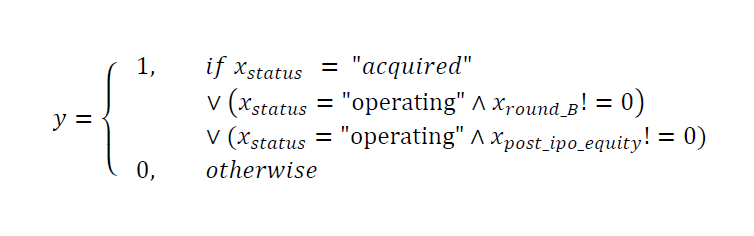

In [30]:
df['success'] = (((df.post_ipo_equity != 0) & (df.status =='operating')) | ((df.round_B != 0.0) & (df.status =='operating')) | (df.status == 'acquired'))
#df['success'] = ( ((df.round_B != 0.0) & (df.status =='operating')) | (df.status == 'acquired'))

In [31]:
df.success = df.success.apply(lambda x : 1 if x == True else 0)

In [32]:
df.success.value_counts()

0    41212
1    8223 
Name: success, dtype: int64

In [33]:
# After creating the target column status Remove the column status from dataframe df
df = df.drop(['status'], axis = 1)

In [34]:
df.head()

name                   homepage_url         market  \
0  #waywire            http://www.waywire.com          News           
1  &TV Communications  http://enjoyandtv.com           Games          
2  'Rock' Your Paper   http://www.rockyourpaper.org    Publishing     
3  (In)Touch Network   http://www.InTouchNetwork.com   Electronics    
4  -R- Ranch and Mine  http://app.thotz.co/            Tourism        

   funding_total_usd country_code         city  funding_rounds founded_year  \
0  1750000.0          USA          New York     1.0             2012          
1  4000000.0          USA          Los Angeles  2.0             2012          
2  40000.0            EST          Tallinn      1.0             2012          
3  1500000.0          GBR          London       1.0             2011          
4  60000.0            USA          Fort Worth   2.0             2014          

        seed    venture  equity_crowdfunding  undisclosed  convertible_note  \
0  1750000.0  0.0        0.0                  0.0          0.0                
1  0.0        4000000.0  0.0                  0.0          0.0                
2  40000.0    0.0        0.0                  0.0          0.0                
3  1500000.0  0.0        0.0                  0.0          0.0                
4  0.0        0.0        60000.0              0.0          0.0                

   debt_financing  angel  grant  private_equity  post_ipo_equity  \
0  0.0             0.0    0.0    0.0             0.0               
1  0.0             0.0    0.0    0.0             0.0               
2  0.0             0.0    0.0    0.0             0.0               
3  0.0             0.0    0.0    0.0             0.0               
4  0.0             0.0    0.0    0.0             0.0               

   post_ipo_debt  secondary_market  product_crowdfunding  round_A  round_B  \
0  0.0            0.0               0.0                   0.0      0.0       
1  0.0            0.0               0.0                   0.0      0.0       
2  0.0            0.0               0.0                   0.0      0.0       
3  0.0            0.0               0.0                   0.0      0.0       
4  0.0            0.0               0.0                   0.0      0.0       

   round_C  round_D  round_E  round_F  round_G  round_H  success  
0  0.0      0.0      0.0      0.0      0.0      0.0      1        
1  0.0      0.0      0.0      0.0      0.0      0.0      0        
2  0.0      0.0      0.0      0.0      0.0      0.0      0        
3  0.0      0.0      0.0      0.0      0.0      0.0      0        
4  0.0      0.0      0.0      0.0      0.0      0.0      0

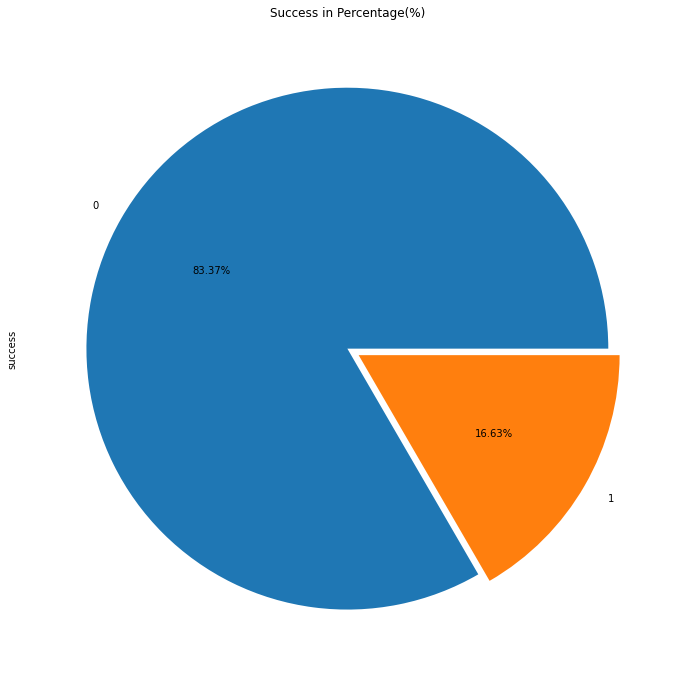

In [35]:
# Pie chart of target variable (1: Success,2:Failure)

df["success"].value_counts().plot(kind="pie",figsize=(12,12),autopct="%1.2f%%",explode=(0,0.05))
plt.title("Success in Percentage(%)")
plt.show()

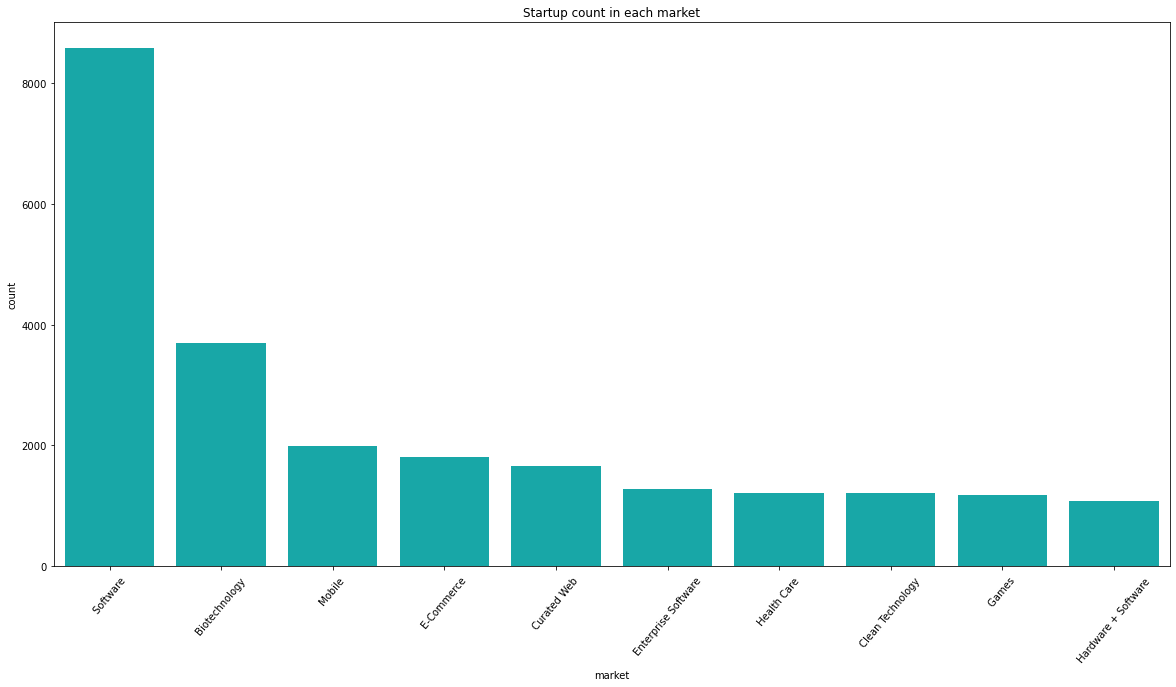

In [36]:
# Top 10 Market counts of start ups
plt.figure(figsize=(20,10))
sns.countplot(df['market'],order=df['market'].value_counts()[:10].index,color="c")
plt.xticks(rotation = 50)
plt.title("Startup count in each market")
plt.show()
#INSIGHTS:- From the above count plot, we can say that most of the startups have been started on Software market followed by biotechnology and so on

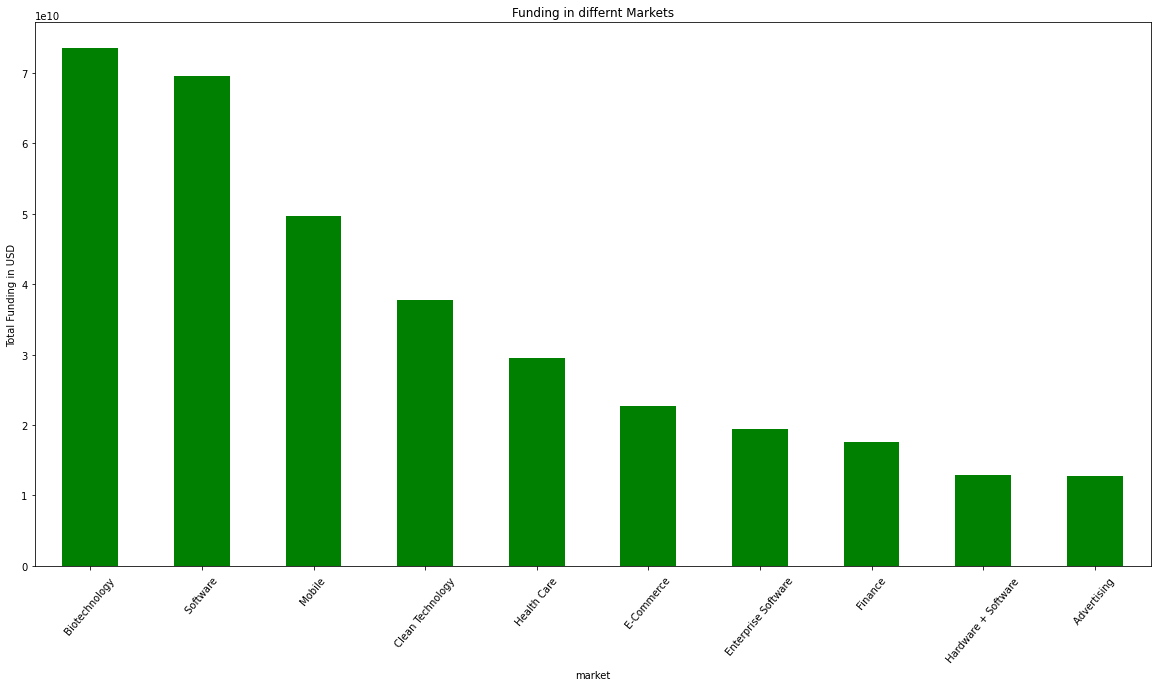

In [37]:
# Top 10 funding in various markets
plt.figure(figsize=(20,10))
df.groupby('market')["funding_total_usd"].sum().sort_values(ascending=False)[:10].plot(kind="bar",color="g")
plt.ylabel("Total Funding in USD")
plt.xticks(rotation = 50)
plt.title("Funding in differnt Markets")
plt.show()
#INSIGHTS:- From the above bar chart, we can clearly see that Biotechnology has the highest funding among all other market.

In [38]:
#Countrywise startup distribution
df["country_code"].value_counts()[:10]

USA    34063
GBR    2642 
CAN    1405 
CHN    1239 
DEU    968  
FRA    866  
IND    849  
ISR    682  
ESP    549  
RUS    368  
Name: country_code, dtype: int64

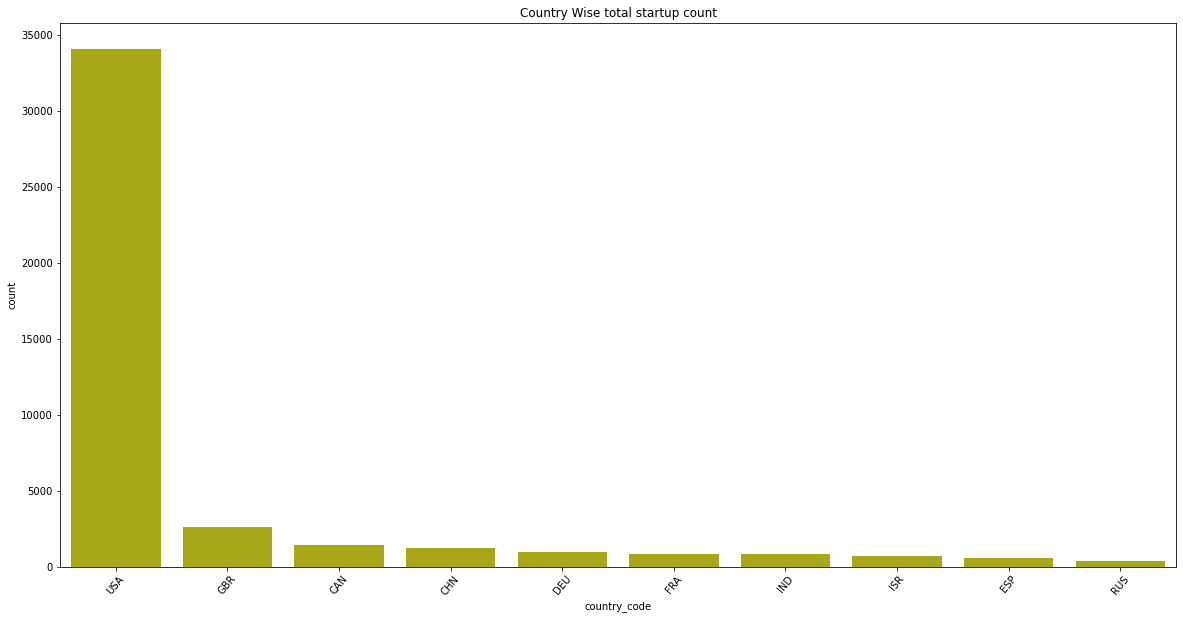

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(df["country_code"],order=df["country_code"].value_counts()[:10].index,color="y")
plt.xticks(rotation=50)
plt.title("Country Wise total startup count")
plt.show()
#INSIGHT: From the above analysis, we can conclude that USA have the highest no. of startup companies than other countries.

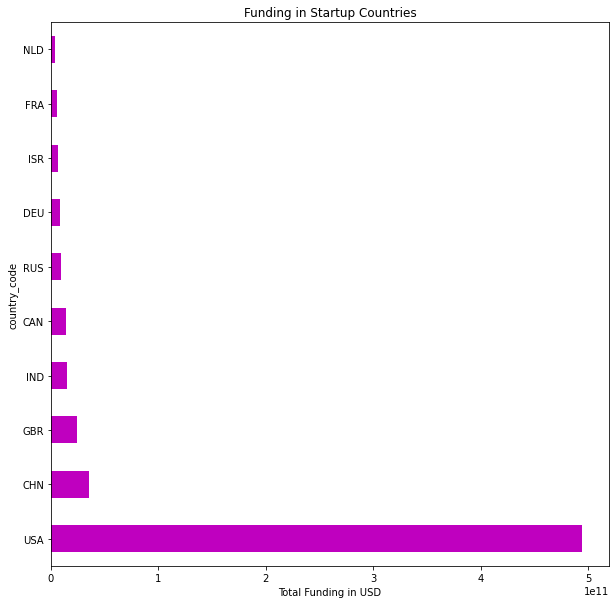

In [40]:
#Top 10 countries with highest funding
df.groupby('country_code')["funding_total_usd"].sum().sort_values(ascending=False)[:10].plot(kind="barh",figsize=(10,10),color="m")
plt.xlabel("Total Funding in USD")
plt.title("Funding in Startup Countries")
plt.show()
#INSIGHT:- From the above bar chart, we can clearly see USA has the highest funding among all other countries.

In [41]:
#Top 10 funding by year
df.groupby('founded_year')["funding_total_usd"].sum().sort_values(ascending=False)[:10]

founded_year
2012    139377122101.0
2007    49958825057.0 
2005    37723202536.0 
2006    37000085015.0 
2004    35462300701.0 
2009    31950549390.0 
1983    31140761140.0 
2008    30601735616.0 
2010    29002007701.0 
2003    28156654213.0 
Name: funding_total_usd, dtype: Float64

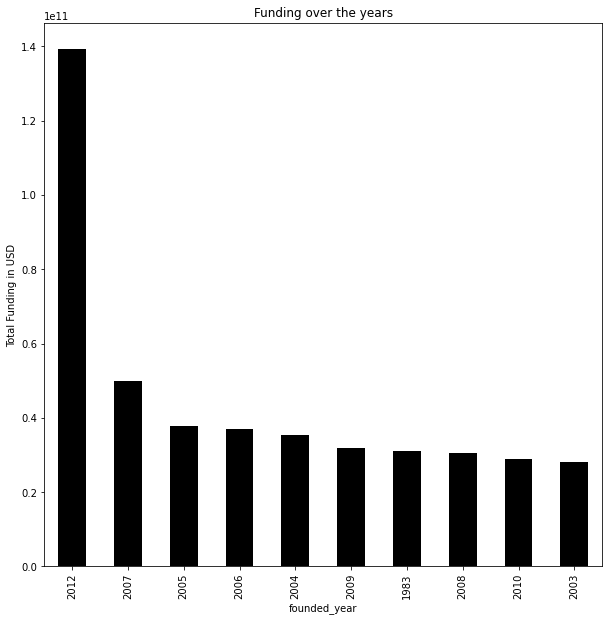

In [42]:
df.groupby('founded_year')["funding_total_usd"].sum().sort_values(ascending=False)[:10].plot(kind="bar",figsize=(10,10),color="k")
plt.ylabel("Total Funding in USD")
plt.title("Funding over the years")
plt.show()
#INSIGHT:- From the above analysis, we can conclude that highest funding have been done in the year of 2012.

In [43]:
#Top 10 Countrywise Current status of Startups
countrywise_status=df.groupby(["country_code","success"]).size().unstack()[:10].sort_values(ascending=False,by=0)
countrywise_status = countrywise_status.fillna(0)

Text(0, 0.5, 'Counts')

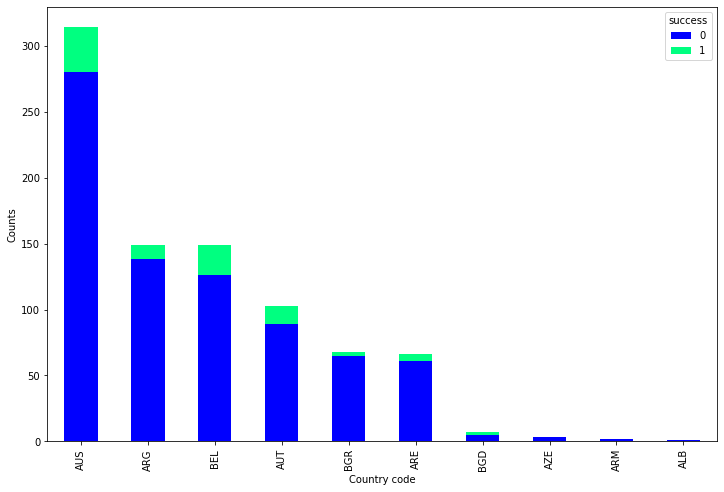

In [44]:
countrywise_status.plot(kind="bar",stacked=True,figsize=(12,8),colormap="winter")
plt.xlabel("Country code")
plt.ylabel("Counts")


In [45]:
#Top 10 Current status of Startups in differrent markets
market_status=df.groupby(["market","success"]).size().unstack()[:10].sort_values(ascending=False,by=0)


Text(0, 0.5, 'Counts')

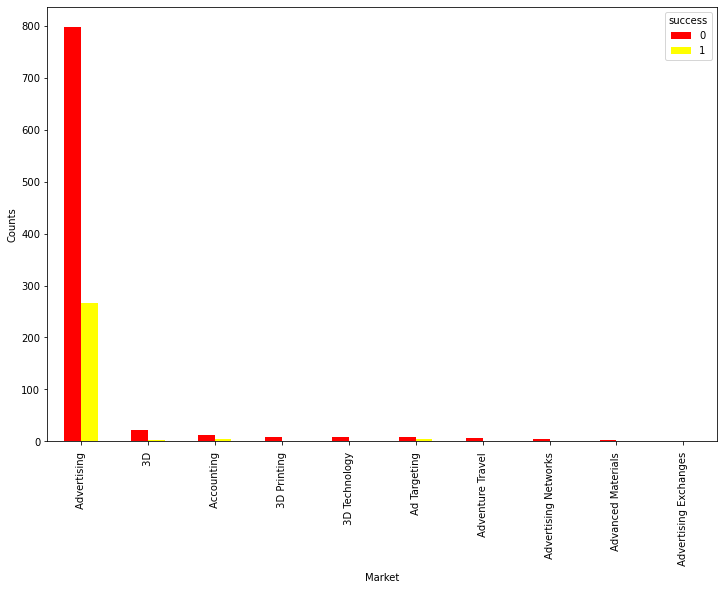

In [46]:

market_status.plot(kind="bar",stacked=False,figsize=(12,8),colormap="autumn")
plt.xlabel("Market")
plt.ylabel("Counts")

In [47]:
df_unicorns = df[(df.funding_total_usd >= 1000000000) & (df.success == 1)]

In [48]:
df_unicorns

name                     homepage_url  \
2639   AOL                     http://www.aol.com                
5532   BlackBerry              http://us.blackberry.com          
7977   Charter Communications  http://www.charter.com            
8664   Clearwire               http://www.clearwire.com          
8889   Cloudera                http://www.cloudera.com           
12375  Dropbox                 http://www.dropbox.com            
14705  Facebook                http://facebook.com               
15360  Fisker Automotive       http://www.fiskerautomotive.com   
15569  Flipkart                http://www.flipkart.com           
18075  Groupon                 http://www.groupon.com            
39127  Snapdeal                http://www.snapdeal.com           
42470  Terra-Gen Power         http://www.terra-genpower.com     
44673  Twitter                 http://twitter.com                
44772  Uber                    http://www.uber.com               
48198  Xerox                   http://www.xerox.com              
48679  Youku                   http://www.youku.com              

                      market  funding_total_usd country_code           city  \
2639    Content Creators      1000000000.0       USA          New York        
5532    Wireless              1000000000.0       CAN          Waterloo        
7977    Software              5162513431.0       USA          Stamford        
8664    Internet              5700000000.0       USA          Kirkland        
8889    Analytics             1201000000.0       USA          Palo Alto       
12375   Cloud Data Services   1107215000.0       USA          San Francisco   
14705   Communities           2425700000.0       USA          Menlo Park      
15360   Automotive            1451000000.0       USA          Irvine          
15569   Online Shopping       2351140000.0       IND          Bangalore       
18075   Advertising           1137000000.0       USA          Chicago         
39127   E-Commerce            1062700000.0       IND          New Delhi       
42470   Clean Technology      1200000000.0       USA          New York        
44673   Software              1160166511.0       USA          San Francisco   
44772   Transportation        1507450000.0       USA          San Francisco   
48198   Hardware + Software   1100000000.0       USA          Normal          
48679   Technology            1320000000.0       CHN          Shanghai        

       funding_rounds founded_year      seed       venture  \
2639   1.0             1985         0.0       0.000000e+00   
5532   1.0             1984         0.0       0.000000e+00   
7977   2.0             1993         0.0       0.000000e+00   
8664   4.0             2003         0.0       0.000000e+00   
8889   8.0             2008         0.0       1.201000e+09   
12375  6.0             2007         15000.0   6.072000e+08   
14705  11.0            2004         0.0       6.152000e+08   
15360  9.0             2008         0.0       1.510000e+08   
15569  11.0            2007         0.0       2.351000e+09   
18075  6.0             2008         0.0       1.136000e+09   
39127  8.0             2010         0.0       3.357000e+08   
42470  1.0             2012         0.0       0.000000e+00   
44673  8.0             2006         0.0       7.601665e+08   
44772  6.0             2009         200000.0  1.506000e+09   
48198  1.0             1906         0.0       0.000000e+00   
48679  6.0             2006         0.0       1.200000e+08   

       equity_crowdfunding  undisclosed  convertible_note  debt_financing  \
2639   0.0                  0.0          0.0               0.000000e+00     
5532   0.0                  0.0          0.0               0.000000e+00     
7977   0.0                  0.0          0.0               0.000000e+00     
8664   0.0                  0.0          0.0               0.000000e+00     
8889   0.0                  0.0          0.0               0.000000e+00     
12375  0.0                  0.0          

In [49]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_unicorns['name'],
    y=df_unicorns['funding_total_usd'],
    name='Total Funding',
    marker_color='darkgreen'
))
fig.add_trace(go.Bar(
    x=df_unicorns['name'],
    y=df_unicorns['venture'],
    name='Venture Capital',
    marker_color='lightgreen'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title = 'Venture Capital and Total Funding By The Unicorns', barmode='group', xaxis_tickangle=-45)
fig.show()

In [50]:
angels = df[df['angel']>=10000000]

fig = px.bar(angels, 
             x=angels['name'], 
             y=angels['angel'],
             height=800,
             color=angels['angel'],
             title = 'The Companies get more than 10M($) by angel',
             text=angels['name'],
             color_continuous_scale='greens',
             )
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(title_x = 0.5)
fig.update_xaxes(tickangle=90, title='Companies')
fig.update_yaxes(title='invest amount by angel($)')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

In [51]:
df.head()

name                   homepage_url         market  \
0  #waywire            http://www.waywire.com          News           
1  &TV Communications  http://enjoyandtv.com           Games          
2  'Rock' Your Paper   http://www.rockyourpaper.org    Publishing     
3  (In)Touch Network   http://www.InTouchNetwork.com   Electronics    
4  -R- Ranch and Mine  http://app.thotz.co/            Tourism        

   funding_total_usd country_code         city  funding_rounds founded_year  \
0  1750000.0          USA          New York     1.0             2012          
1  4000000.0          USA          Los Angeles  2.0             2012          
2  40000.0            EST          Tallinn      1.0             2012          
3  1500000.0          GBR          London       1.0             2011          
4  60000.0            USA          Fort Worth   2.0             2014          

        seed    venture  equity_crowdfunding  undisclosed  convertible_note  \
0  1750000.0  0.0        0.0                  0.0          0.0                
1  0.0        4000000.0  0.0                  0.0          0.0                
2  40000.0    0.0        0.0                  0.0          0.0                
3  1500000.0  0.0        0.0                  0.0          0.0                
4  0.0        0.0        60000.0              0.0          0.0                

   debt_financing  angel  grant  private_equity  post_ipo_equity  \
0  0.0             0.0    0.0    0.0             0.0               
1  0.0             0.0    0.0    0.0             0.0               
2  0.0             0.0    0.0    0.0             0.0               
3  0.0             0.0    0.0    0.0             0.0               
4  0.0             0.0    0.0    0.0             0.0               

   post_ipo_debt  secondary_market  product_crowdfunding  round_A  round_B  \
0  0.0            0.0               0.0                   0.0      0.0       
1  0.0            0.0               0.0                   0.0      0.0       
2  0.0            0.0               0.0                   0.0      0.0       
3  0.0            0.0               0.0                   0.0      0.0       
4  0.0            0.0               0.0                   0.0      0.0       

   round_C  round_D  round_E  round_F  round_G  round_H  success  
0  0.0      0.0      0.0      0.0      0.0      0.0      1        
1  0.0      0.0      0.0      0.0      0.0      0.0      0        
2  0.0      0.0      0.0      0.0      0.0      0.0      0        
3  0.0      0.0      0.0      0.0      0.0      0.0      0        
4  0.0      0.0      0.0      0.0      0.0      0.0      0

In [52]:
df["funding_total_usd"] = df["funding_total_usd"].astype(np.float64)


In [53]:
df.describe()

funding_total_usd  funding_rounds          seed       venture  \
count  4.943500e+04       49435.000000    4.943500e+04  4.943500e+04   
mean   1.333404e+07       1.696227        2.173206e+05  7.501444e+06   
std    1.535392e+08       1.294244        1.057014e+06  2.847194e+07   
min    1.000000e+00       1.000000        0.000000e+00  0.000000e+00   
25%    5.074200e+05       1.000000        0.000000e+00  0.000000e+00   
50%    1.000000e+06       1.000000        0.000000e+00  0.000000e+00   
75%    6.771937e+06       2.000000        2.500000e+04  5.000000e+06   
max    3.007950e+10       18.000000       1.300000e+08  2.351000e+09   

       equity_crowdfunding   undisclosed  convertible_note  debt_financing  \
count  4.943500e+04         4.943500e+04  4.943500e+04      4.943500e+04     
mean   6.163696e+03         1.302292e+05  2.336552e+04      1.888271e+06     
std    1.999109e+05         2.981494e+06  1.432089e+06      1.382088e+08     
min    0.000000e+00         0.000000e+00  0.000000e+00      0.000000e+00     
25%    0.000000e+00         0.000000e+00  0.000000e+00      0.000000e+00     
50%    0.000000e+00         0.000000e+00  0.000000e+00      0.000000e+00     
75%    0.000000e+00         0.000000e+00  0.000000e+00      0.000000e+00     
max    2.500000e+07         2.924328e+08  3.000000e+08      3.007950e+10     

              angel         grant  private_equity  post_ipo_equity  \
count  4.943500e+04  4.943500e+04  4.943500e+04    4.943500e+04      
mean   6.537966e+04  1.628552e+05  2.068539e+06    6.089106e+05      
std    6.582445e+05  5.612258e+06  3.164673e+07    2.678429e+07      
min    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00      
25%    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00      
50%    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00      
75%    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00      
max    6.359026e+07  7.505000e+08  3.500000e+09    4.700000e+09      

       post_ipo_debt  secondary_market  product_crowdfunding       round_A  \
count  4.943500e+04   4.943500e+04      4.943500e+04          4.943500e+04   
mean   4.434629e+05   3.845826e+04      7.074656e+03          1.244031e+06   
std    3.428273e+07   3.864578e+06      4.282296e+05          5.532133e+06   
min    0.000000e+00   0.000000e+00      0.000000e+00          0.000000e+00   
25%    0.000000e+00   0.000000e+00      0.000000e+00          0.000000e+00   
50%    0.000000e+00   0.000000e+00      0.000000e+00          0.000000e+00   
75%    0.000000e+00   0.000000e+00      0.000000e+00          0.000000e+00   
max    5.800000e+09   6.806116e+08      7.200000e+07          3.190000e+08   

            round_B       round_C       round_D       round_E       round_F  \
count  4.943500e+04  4.943500e+04  4.943500e+04  4.943500e+04  4.943500e+04   
mean   1.492982e+06  1.205429e+06  7.375708e+05  3.424890e+05  1.697795e+05   
std    7.472922e+06  7.993829e+06  9.815514e+06  5.407078e+06  6.278096e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    5.420000e+08  4.900000e+08  1.200000e+09  4.000000e+08  1.060000e+09   

            round_G       round_H       success  
count  4.943500e+04  4.943500e+04  49435.000000  
mean   5.767417e+04  1.423283e+04  0.166340      
std    5.252471e+06  2.716948e+06  0.372389      
min    0.000000e+00  0.000000e+00  0.000000      
25%    0.000000e+00  0.000000e+00  0.000000      
50%    0.000000e+00  0.000000e+00  0.000000      
75%    0.000000e+00  0.000000e+00  0.000000      
max    1.000000e+09  6.000000e+08  1.000000

In [54]:
encoder_name=LabelEncoder()
encoder_market=LabelEncoder()
encoder_country_code=LabelEncoder()
encoder_city=LabelEncoder()
encoder_year=LabelEncoder()
encoder_homepage_url=LabelEncoder()
founded_year_url=LabelEncoder()

In [55]:
df['name']=encoder_name.fit_transform(df['name'])
df['market']=encoder_market.fit_transform(df['market'])
df['country_code']=encoder_country_code.fit_transform(df['country_code'])
df['city']=encoder_city.fit_transform(df['city'])
df['homepage_url']=encoder_homepage_url.fit_transform(df['homepage_url'])
df['founded_year']=founded_year_url.fit_transform(df['founded_year'])


In [56]:
df.head()

name  homepage_url  market  funding_total_usd  country_code  city  \
0  0     43609         465     1750000.0          110           2547   
1  1     4422          277     4000000.0          110           2098   
2  2     37196         543     40000.0            35            3645   
3  3     15435         211     1500000.0          38            2085   
4  4     1124          683     60000.0            110           1234   

   funding_rounds  founded_year       seed    venture  equity_crowdfunding  \
0  1.0             100           1750000.0  0.0        0.0                   
1  2.0             100           0.0        4000000.0  0.0                   
2  1.0             100           40000.0    0.0        0.0                   
3  1.0             99            1500000.0  0.0        0.0                   
4  2.0             102           0.0        0.0        60000.0               

   undisclosed  convertible_note  debt_financing  angel  grant  \
0  0.0          0.0               0.0             0.0    0.0     
1  0.0          0.0               0.0             0.0    0.0     
2  0.0          0.0               0.0             0.0    0.0     
3  0.0          0.0               0.0             0.0    0.0     
4  0.0          0.0               0.0             0.0    0.0     

   private_equity  post_ipo_equity  post_ipo_debt  secondary_market  \
0  0.0             0.0              0.0            0.0                
1  0.0             0.0              0.0            0.0                
2  0.0             0.0              0.0            0.0                
3  0.0             0.0              0.0            0.0                
4  0.0             0.0              0.0            0.0                

   product_crowdfunding  round_A  round_B  round_C  round_D  round_E  round_F  \
0  0.0                   0.0      0.0      0.0      0.0      0.0      0.0       
1  0.0                   0.0      0.0      0.0      0.0      0.0      0.0       
2  0.0                   0.0      0.0      0.0      0.0      0.0      0.0       
3  0.0                   0.0      0.0      0.0      0.0      0.0      0.0       
4  0.0                   0.0      0.0      0.0      0.0      0.0      0.0       

   round_G  round_H  success  
0  0.0      0.0      1        
1  0.0      0.0      0        
2  0.0      0.0      0        
3  0.0      0.0      0        
4  0.0      0.0      0

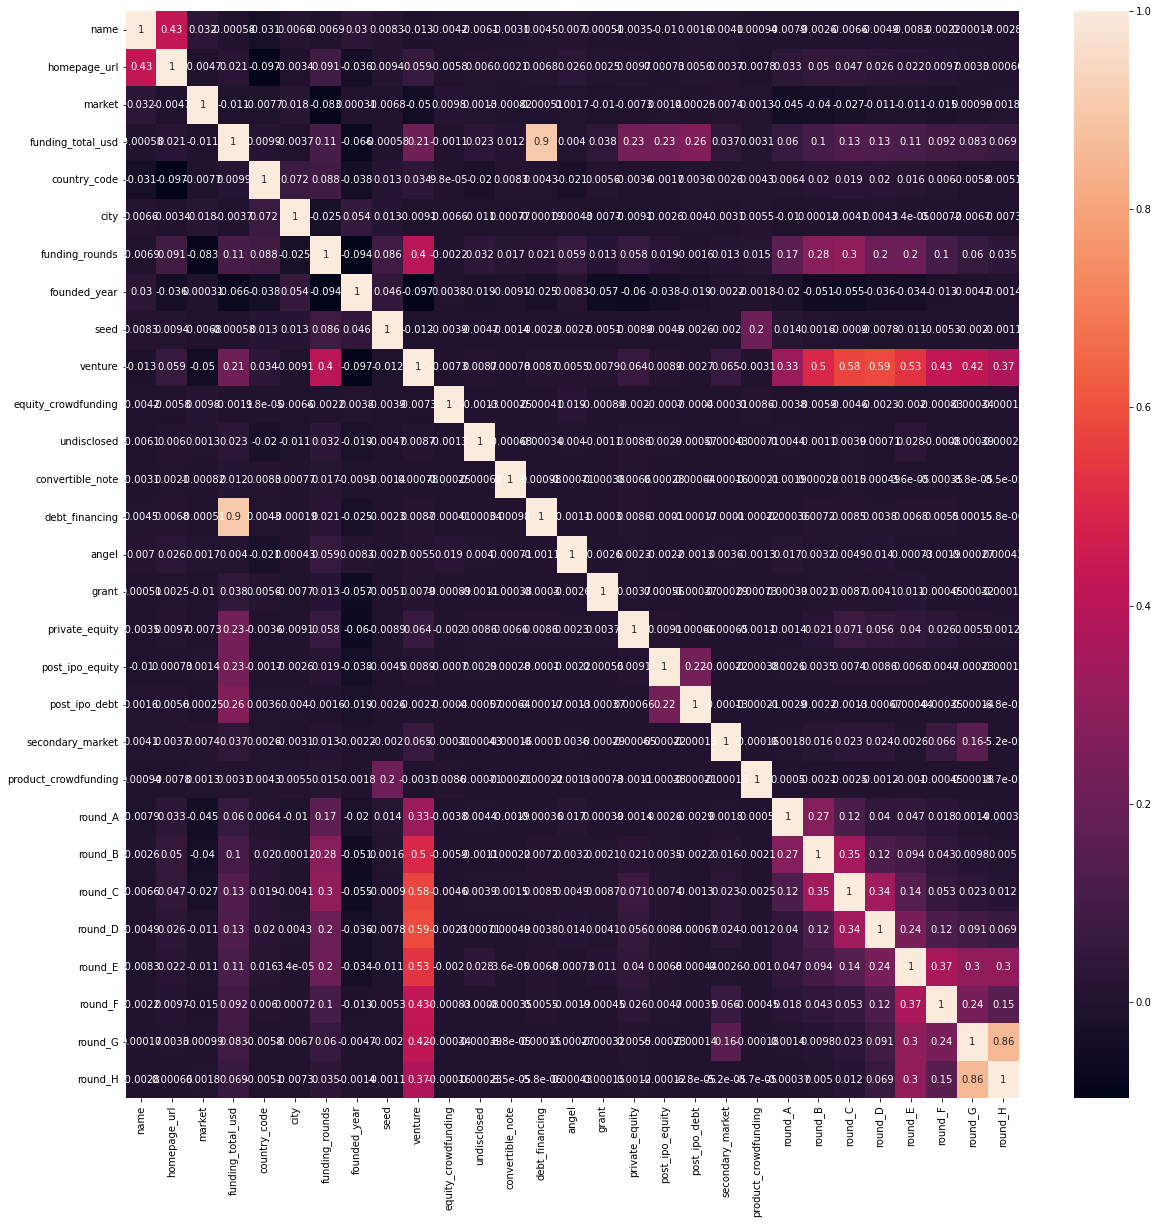

In [57]:
#Correlation matrix
df_corr=df.drop("success",axis=1).corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True)
plt.show()

In [58]:
threshold=0.5


In [59]:
#Checking for multicolinearity
def correlation_fun(ds,threshold):
    corr_col=set()
    corr_mat=ds.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>threshold:
                colname=corr_mat.columns[i]
                corr_col.add(colname)
    return corr_col

In [60]:
correlation_fun(df.drop("success",axis=1),threshold)


{'debt_financing', 'round_C', 'round_D', 'round_E', 'round_H'}

In [61]:
#Dropping columns which are highly correlated to each other
df=df.drop(['debt_financing', 'round_C', 'round_D', 'round_E', 'round_H'],axis=1)

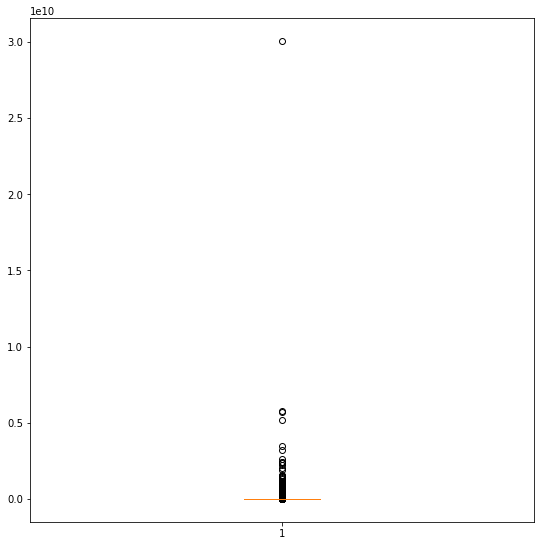

In [62]:
fig = plt.figure(figsize =(7, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df.funding_total_usd)
plt.show()

In [63]:
df.drop(df[df.funding_total_usd > np.percentile(df.funding_total_usd,95)].index, inplace=True)


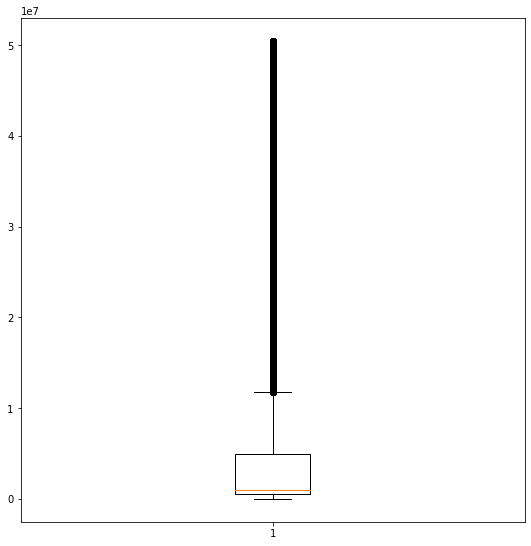

In [64]:
fig = plt.figure(figsize =(7, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df.funding_total_usd)
plt.show()

In [65]:
#Data Modelling and Tuning
X=df.drop('success',axis=1)
y=df['success']

### Feature Selection


In [66]:
mutual_info=mutual_info_classif(X,y)

In [67]:

mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

round_B                 0.178832
venture                 0.094120
funding_total_usd       0.091136
funding_rounds          0.044188
founded_year            0.036296
round_A                 0.031838
city                    0.019987
seed                    0.012227
market                  0.010163
homepage_url            0.008730
country_code            0.008068
post_ipo_equity         0.006462
name                    0.004555
grant                   0.002415
round_F                 0.000000
secondary_market        0.000000
product_crowdfunding    0.000000
convertible_note        0.000000
post_ipo_debt           0.000000
private_equity          0.000000
angel                   0.000000
undisclosed             0.000000
equity_crowdfunding     0.000000
round_G                 0.000000
dtype: float64

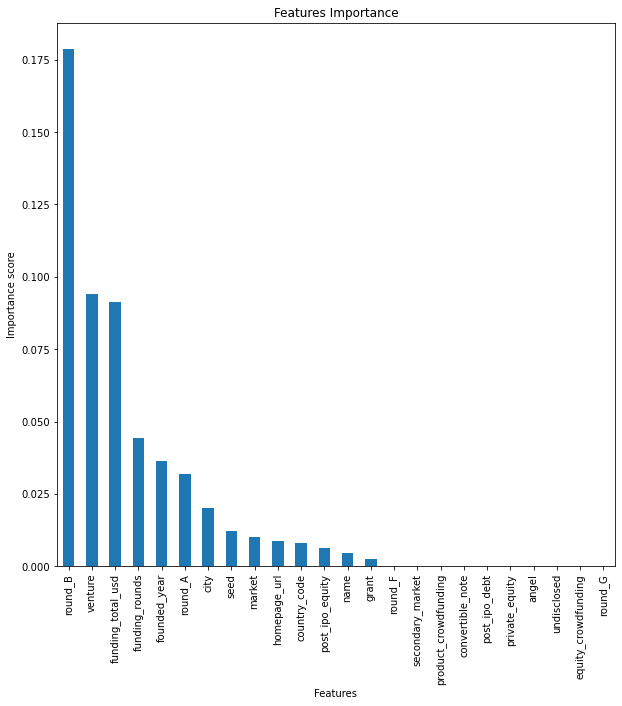

In [68]:
mutual_data.sort_values(ascending=False).plot(kind="bar",figsize=(10,10))
plt.xlabel('Features')
plt.ylabel('Importance score')
plt.title('Features Importance')
plt.show()

In [69]:
#Dropping columns which are less or not related to target variable
X=X.drop(["convertible_note","undisclosed","private_equity","angel","post_ipo_debt","secondary_market","equity_crowdfunding"],axis=1)


## Model Bulding

In [70]:
#train and test the model

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [71]:
x_train.shape

(37572, 17)

In [72]:
x_test.shape

(9394, 17)

### K-Nearest Neighbors Algorithm (KNN)

In [73]:
#KNN classifier¶
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_train_knn=knn.predict(x_train)
y_pred_knn=knn.predict(x_test)

In [74]:
# Train accuracy 
knn_train_acc = accuracy_score(y_train,y_pred_train_knn)
print(knn_train_acc)

0.9399819014159481


In [75]:
acc_train=[]
acc_train.append(knn_train_acc)

In [76]:
# Result dataframe 
models = ['K-Nearest Neighbors (KNN)','Decision tree','Random forest','XGBoost']
result = pd.DataFrame(models, columns=['Model_name'])

In [77]:
result

Model_name
0  K-Nearest Neighbors (KNN)
1  Decision tree            
2  Random forest            
3  XGBoost

In [78]:
# Train confusion matrix
knn_train_matrix = confusion_matrix(y_train,y_pred_train_knn)
print(knn_train_matrix)

[[31819   268]
 [ 1987  3498]]


<AxesSubplot:>

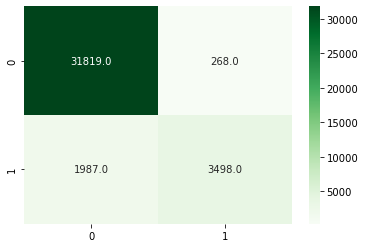

In [79]:
# Train confusion matrix
sns.heatmap(knn_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [80]:
#Test accuracy
knn_test_acc = accuracy_score(y_test,y_pred_knn)
print(knn_test_acc)

0.9295294869065361


In [81]:
acc_test=[]
acc_test.append(knn_test_acc)

In [82]:
# Test confusion matrix
knn_test_matrix = confusion_matrix(y_test,y_pred_knn)
print(knn_test_matrix)

[[7884  105]
 [ 557  848]]


<AxesSubplot:>

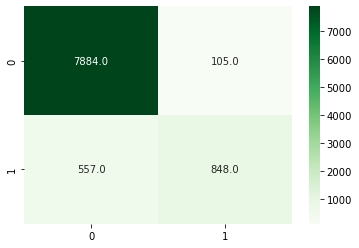

In [83]:
# Test confusion matrix
sns.heatmap(knn_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [84]:
# Test F1 Score 
knn_test_f1 = f1_score(y_test,y_pred_knn,average='binary')
print(knn_test_f1)

0.719253604749788


In [85]:

f1_test=[]
f1_test.append(knn_test_f1)

In [86]:
# Test classification report
print(classification_report(y_test,y_pred_knn))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7989
           1       0.89      0.60      0.72      1405

    accuracy                           0.93      9394
   macro avg       0.91      0.80      0.84      9394
weighted avg       0.93      0.93      0.92      9394



In [87]:
# Test ROC AUC Curve 
knn_test_roc = roc_auc_score(y_test,y_pred_knn)
print(knn_test_roc)

0.7952078235687949


In [88]:

roc_test=[]
roc_test.append(knn_test_roc)

In [89]:
pre_test = []
pre_test.append(precision_score(y_test,y_pred_knn))
precision_score(y_test,y_pred_knn)


0.8898216159496327

In [90]:
recall_test = []
recall_test.append(recall_score(y_test,y_pred_knn))
recall_score(y_test,y_pred_knn)

0.6035587188612099

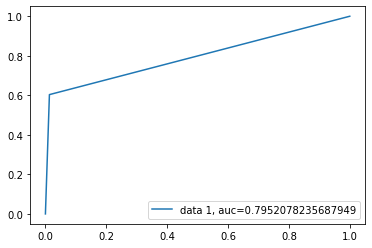

In [91]:
# Test ROC AUC Curve 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_knn)
auc = metrics.roc_auc_score(y_test, y_pred_knn)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Decision tree classifier

In [92]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_train_dtc=dtc.predict(x_train)
y_pred_dtc=dtc.predict(x_test)

In [93]:
# Train accuracy 
dtc_train_acc = accuracy_score(y_train,y_pred_train_dtc)
print(dtc_train_acc)

1.0


In [94]:
acc_train.append(dtc_train_acc)


In [95]:
# Train confusion matrix
dtc_train_matrix = confusion_matrix(y_train,y_pred_train_dtc)
print(dtc_train_matrix)

[[32087     0]
 [    0  5485]]


<AxesSubplot:>

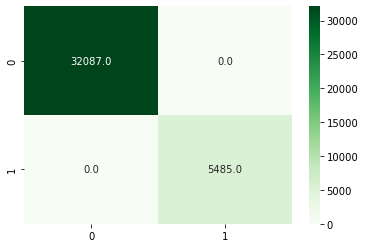

In [96]:
# Train confusion matrix
sns.heatmap(dtc_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [97]:
#Test accuracy
dtc_test_acc= accuracy_score(y_test,y_pred_dtc)
print(dtc_test_acc)

0.8840749414519906


In [98]:
acc_test.append(dtc_test_acc)

In [99]:
# Test confusion matrix
dtc_test_matrix = confusion_matrix(y_test,y_pred_dtc)
print(dtc_test_matrix)

[[7401  588]
 [ 501  904]]


<AxesSubplot:>

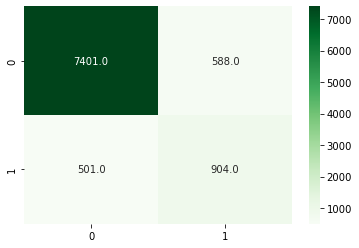

In [100]:
# Test confusion matrix
sns.heatmap(dtc_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [101]:
# Test F1 Score 
dtc_test_f1 = f1_score(y_test,y_pred_dtc,average='binary')
print(dtc_test_f1)

0.6240938902312738


In [102]:
f1_test.append(dtc_test_f1)

In [103]:
# Test classification report

print(classification_report(y_test,y_pred_dtc))


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7989
           1       0.61      0.64      0.62      1405

    accuracy                           0.88      9394
   macro avg       0.77      0.78      0.78      9394
weighted avg       0.89      0.88      0.89      9394



In [104]:
# Test ROC AUC Curve 
dtc_test_roc = roc_auc_score(y_test,y_pred_dtc)
print(dtc_test_roc)

0.7849075842272448


In [105]:
roc_test.append(dtc_test_roc)

In [106]:
pre_test.append(precision_score(y_test,y_pred_dtc))
precision_score(y_test,y_pred_dtc)


0.6058981233243967

In [107]:
recall_test.append(recall_score(y_test,y_pred_dtc))
recall_score(y_test,y_pred_dtc)


0.6434163701067616

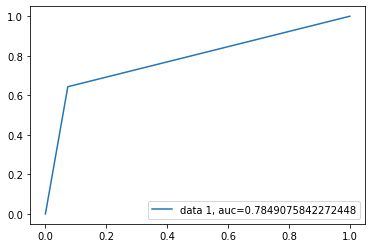

In [108]:
# Test ROC AUC Curve 

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_dtc)
auc = metrics.roc_auc_score(y_test, y_pred_dtc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Random forest classifier


In [109]:
params = {
    'max_depth': [2,3,5,10,20,25,50],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [110]:
rf=RandomForestClassifier(random_state=100)


In [111]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [112]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 168 candidates, totalling 672 fits
Wall time: 2min 54s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 25, 50],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='f1', verbose=1)

In [113]:
grid_search.best_score_

0.7539256908848558

In [114]:
dt_best = grid_search.best_estimator_
dt_best

RandomForestClassifier(max_depth=50, min_samples_leaf=5, random_state=100)

In [115]:
#Random forest classifier
random=RandomForestClassifier(max_depth=25, min_samples_leaf=5, n_estimators=50,
                       random_state=100)

random.fit(x_train,y_train)

y_pred_train_random=random.predict(x_train)
y_pred_rfc=random.predict(x_test)

In [116]:
# Train accuracy 
rf_train_acc = accuracy_score(y_train,y_pred_train_random)
print(rf_train_acc)

0.9421111465985308


In [117]:
acc_train.append(rf_train_acc)


In [118]:
# Train confusion matrix
random_train_matrix = confusion_matrix(y_train,y_pred_train_random)
print(random_train_matrix)

[[31913   174]
 [ 2001  3484]]


<AxesSubplot:>

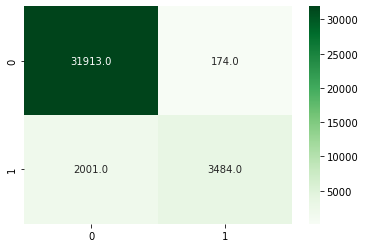

In [119]:
# Train confusion matrix
sns.heatmap(random_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [120]:
#Test accuracy
rf_test_acc = accuracy_score(y_test,y_pred_rfc)
print(rf_train_acc)

0.9421111465985308


In [121]:
acc_test.append(rf_train_acc)

In [122]:
# Test confusion matrix
random_test_matrix = confusion_matrix(y_test,y_pred_rfc)
print(random_test_matrix)

[[7944   45]
 [ 533  872]]


<AxesSubplot:>

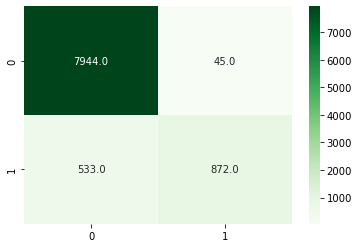

In [123]:
# Test confusion matrix
sns.heatmap(random_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [124]:
# Test F1 Score 
rf_f1_test = f1_score(y_test,y_pred_rfc,average='binary')
print(rf_f1_test)

0.7510766580534022


In [125]:
f1_test.append(rf_f1_test)

In [126]:
# Test classification report

print(classification_report(y_test,y_pred_rfc))


              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7989
           1       0.95      0.62      0.75      1405

    accuracy                           0.94      9394
   macro avg       0.94      0.81      0.86      9394
weighted avg       0.94      0.94      0.93      9394



In [127]:
# Test ROC AUC Curve 
rf_test_roc = roc_auc_score(y_test,y_pred_rfc)
print(rf_test_roc)

0.8075039121853045


In [128]:
roc_test.append(rf_test_roc)

In [129]:
pre_test.append(precision_score(y_test,y_pred_rfc))
precision_score(y_test,y_pred_rfc)


0.95092693565976

In [130]:
recall_test.append(recall_score(y_test,y_pred_rfc))
recall_score(y_test,y_pred_rfc)

0.6206405693950178

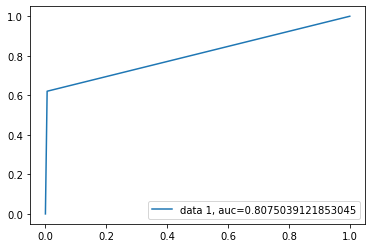

In [131]:
# Test ROC AUC Curve 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_rfc)
auc = metrics.roc_auc_score(y_test, y_pred_rfc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### XGBoost classifier

In [132]:
import xgboost as xgb

xgb = xgb.XGBClassifier(eval_metric='mlogloss')
xgb.fit(x_train,y_train)
y_pred_train_xgb=xgb.predict(x_train)
y_pred_xgb = xgb.predict(x_test)


In [133]:
# Train accuracy 
xgb_train_acc = accuracy_score(y_train,y_pred_train_xgb)
print(xgb_train_acc)

0.9468487171297775


In [134]:
acc_train.append(xgb_train_acc)

In [135]:
# Train confusion matrix
xgb_train_matrix = confusion_matrix(y_train,y_pred_train_xgb)
print(xgb_train_matrix)

[[31958   129]
 [ 1868  3617]]


<AxesSubplot:>

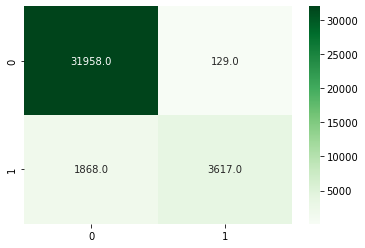

In [136]:
# Train confusion matrix
sns.heatmap(xgb_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [137]:
#Test accuracy
xgb_test_acc = accuracy_score(y_test,y_pred_xgb)
print(xgb_test_acc)

0.9368746008090271


In [138]:
acc_test.append(xgb_test_acc)

In [139]:
# Test confusion matrix
xgb_test_matrix = confusion_matrix(y_test,y_pred_xgb)
print(xgb_test_matrix)

[[7922   67]
 [ 526  879]]


<AxesSubplot:>

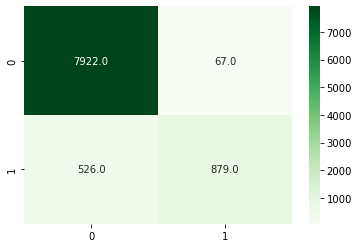

In [140]:
# Test confusion matrix
sns.heatmap(xgb_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [141]:
# Test F1 Score 
xgb_test_f1 = f1_score(y_test,y_pred_xgb,average='binary')
print(xgb_test_f1)

0.7477669076988517


In [142]:
f1_test.append(xgb_test_f1)

In [143]:
# Test classification report
print(classification_report(y_test,y_pred_xgb))


              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7989
           1       0.93      0.63      0.75      1405

    accuracy                           0.94      9394
   macro avg       0.93      0.81      0.86      9394
weighted avg       0.94      0.94      0.93      9394



In [144]:
# Test ROC AUC Curve 
xgb_test_roc = roc_auc_score(y_test,y_pred_xgb)
print(xgb_test_roc)

0.8086181221599629


In [145]:
roc_test.append(xgb_test_roc)

In [146]:
pre_test.append(precision_score(y_test,y_pred_xgb))
precision_score(y_test,y_pred_xgb)

0.9291754756871036

In [147]:
recall_test.append(recall_score(y_test,y_pred_xgb))
recall_score(y_test,y_pred_xgb)

0.6256227758007118

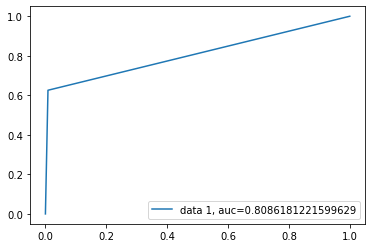

In [148]:
# Test ROC AUC Curve 

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_xgb)
auc = metrics.roc_auc_score(y_test, y_pred_xgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [149]:
result['acc_train'] = acc_train
result['acc_test'] = acc_test
result['f1_test'] = f1_test
result['roc_test'] = roc_test

In [150]:
result['pre_test'] = pre_test
result['recall_test'] = recall_test

In [151]:
result

Model_name  acc_train  acc_test   f1_test  roc_test  \
0  K-Nearest Neighbors (KNN)  0.939982   0.929529  0.719254  0.795208   
1  Decision tree              1.000000   0.884075  0.624094  0.784908   
2  Random forest              0.942111   0.942111  0.751077  0.807504   
3  XGBoost                    0.946849   0.936875  0.747767  0.808618   

   pre_test  recall_test  
0  0.889822  0.603559     
1  0.605898  0.643416     
2  0.950927  0.620641     
3  0.929175  0.625623

### Predication using SMOTE to handle data imbalance 

In [152]:
y.value_counts()

0    40076
1    6890 
Name: success, dtype: int64

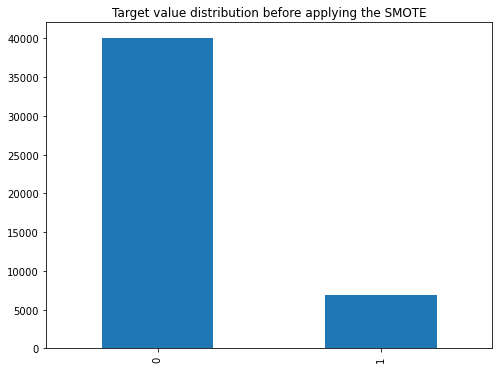

In [153]:
# Target value distribution before applying the SMOTE
plt.figure(figsize=(8,6))
y.value_counts().plot(kind="bar")
plt.title("Target value distribution before applying the SMOTE")
plt.show()

In [154]:

smt = SMOTE(random_state=100)
X_s, y_s = smt.fit_sample(X, y)

In [155]:
y_s.value_counts()

1    40076
0    40076
Name: success, dtype: int64

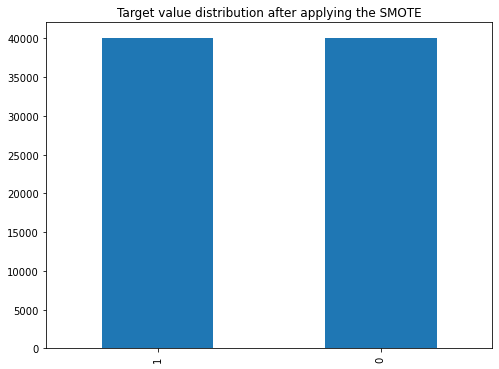

In [156]:
# Target value distribution after applying the SMOTE
plt.figure(figsize=(8,6))
y_s.value_counts().plot(kind="bar")
plt.title("Target value distribution after applying the SMOTE")
plt.show()

In [157]:
x_train_s,x_test_s,y_train_s,y_test_s=train_test_split(X_s,y_s,test_size=0.2)

### K-Nearest Neighbors Algorithm (KNN) with SMOTE

In [158]:
#KNN classifier¶
knn_s=KNeighborsClassifier(n_neighbors=5)
knn_s.fit(x_train_s,y_train_s)
y_pred_knn_s_train=knn_s.predict(x_train_s)
y_pred_knn_s=knn_s.predict(x_test_s)

In [159]:
acc_train_smote = []
acc_test_smote = []
f1_test_smote = []
roc_test_smote = []
pre_test_smote = []
recall_test_smote = []

In [160]:
# Train accuracy 
acc_train_smote.append(accuracy_score(y_train_s,y_pred_knn_s_train))
accuracy_score(y_train_s,y_pred_knn_s_train)


0.9087974298591726

In [161]:
# Train confusion matrix
knn_s_train_matrix = confusion_matrix(y_train_s,y_pred_knn_s_train)
print(knn_s_train_matrix)

[[28690  3332]
 [ 2516 29583]]


<AxesSubplot:>

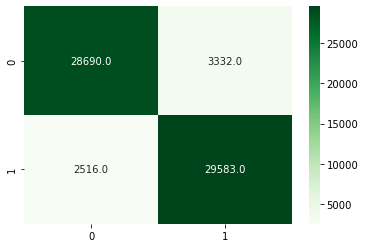

In [162]:
# Train confusion matrix
sns.heatmap(knn_s_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [163]:
#Test accuracy

acc_test_smote.append(accuracy_score(y_test_s,y_pred_knn_s))
accuracy_score(y_test_s,y_pred_knn_s)

0.8591479009419251

In [164]:
# Test confusion matrix
knn_s_test_matrix = confusion_matrix(y_test_s,y_pred_knn_s)
print(knn_s_test_matrix)

[[6814 1240]
 [1018 6959]]


<AxesSubplot:>

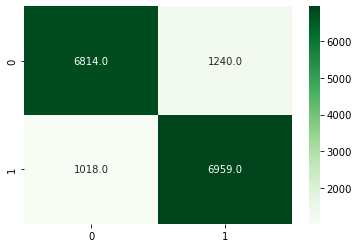

In [165]:
# Test confusion matrix
sns.heatmap(knn_s_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [166]:
# Test F1 Score 
f1_test_smote.append(f1_score(y_test_s,y_pred_knn_s,average='binary'))
f1_score(y_test_s,y_pred_knn_s,average='binary')

0.8604104846686449

In [167]:
# Test classification report
print(classification_report(y_test_s,y_pred_knn_s))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      8054
           1       0.85      0.87      0.86      7977

    accuracy                           0.86     16031
   macro avg       0.86      0.86      0.86     16031
weighted avg       0.86      0.86      0.86     16031



In [168]:
# Test ROC AUC Curve 
roc_test_smote.append(roc_auc_score(y_test_s,y_pred_knn_s))
roc_auc_score(y_test_s,y_pred_knn_s)

0.8592111682896124

In [169]:
pre_test_smote.append(precision_score(y_test_s,y_pred_knn_s))
precision_score(y_test_s,y_pred_knn_s)

0.8487620441517258

In [170]:
recall_test_smote.append(recall_score(y_test_s,y_pred_knn_s))
recall_score(y_test_s,y_pred_knn_s)

0.8723831014165726

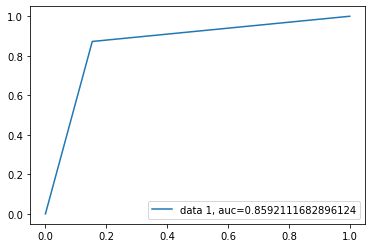

In [171]:
# Test ROC AUC Curve 

fpr, tpr, _ = metrics.roc_curve(y_test_s,  y_pred_knn_s)
auc = metrics.roc_auc_score(y_test_s, y_pred_knn_s)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Decision tree classifier with SMOTE


In [172]:
dtc_s=DecisionTreeClassifier()
dtc_s.fit(x_train_s,y_train_s)
y_pred_train_dtc_s=dtc_s.predict(x_train_s)
y_pred_dtc_s=dtc.predict(x_test_s)

In [173]:
# Train accuracy 
acc_train_smote.append(accuracy_score(y_train_s,y_pred_train_dtc_s))
accuracy_score(y_train_s,y_pred_train_dtc_s)


1.0

In [174]:
# Train confusion matrix
dtc_s_train_matrix = confusion_matrix(y_train_s,y_pred_train_dtc_s)
print(dtc_s_train_matrix)

[[32022     0]
 [    0 32099]]


<AxesSubplot:>

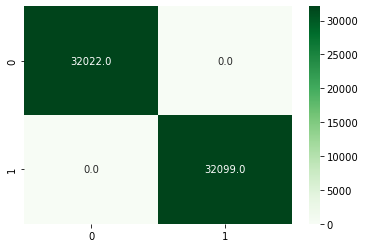

In [175]:
# Train confusion matrix
sns.heatmap(dtc_s_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [176]:
#Test accuracy
acc_test_smote.append(accuracy_score(y_test_s,y_pred_dtc_s))
accuracy_score(y_test_s,y_pred_dtc_s)

0.8669452934938556

In [177]:
# Test confusion matrix
dtc_s_test_matrix = confusion_matrix(y_test_s,y_pred_dtc_s)
print(dtc_s_test_matrix)

[[7936  118]
 [2015 5962]]


<AxesSubplot:>

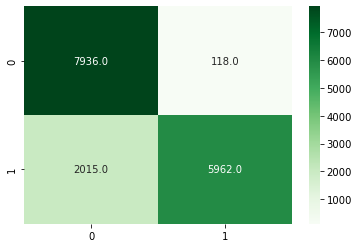

In [178]:
# Test confusion matrix
sns.heatmap(dtc_s_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [179]:
# Test F1 Score 
f1_test_smote.append(f1_score(y_test_s,y_pred_dtc_s,average='binary'))
f1_score(y_test_s,y_pred_dtc_s,average='binary')

0.8482606530554173

In [180]:
# Test classification report
print(classification_report(y_test_s,y_pred_dtc_s))


              precision    recall  f1-score   support

           0       0.80      0.99      0.88      8054
           1       0.98      0.75      0.85      7977

    accuracy                           0.87     16031
   macro avg       0.89      0.87      0.86     16031
weighted avg       0.89      0.87      0.86     16031



In [181]:
# Test ROC AUC Curve 
roc_test_smote.append(roc_auc_score(y_test_s,y_pred_dtc_s))
roc_auc_score(y_test_s,y_pred_dtc_s)

0.8663738332134985

In [182]:
pre_test_smote.append(precision_score(y_test_s,y_pred_dtc_s))
precision_score(y_test_s,y_pred_dtc_s)

0.9805921052631579

In [183]:
recall_test_smote.append(recall_score(y_test_s,y_pred_dtc_s))
recall_score(y_test_s,y_pred_dtc_s)

0.7473987714679704

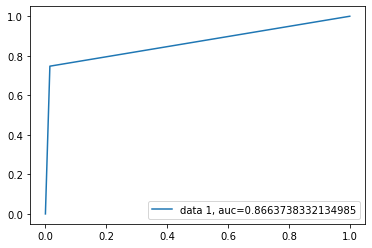

In [184]:
# Test ROC AUC Curve 

fpr, tpr, _ = metrics.roc_curve(y_test_s,  y_pred_dtc_s)
auc = metrics.roc_auc_score(y_test_s, y_pred_dtc_s)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Random forest classifier with SMOTE


In [185]:
#Random forest classifier¶
random_s=RandomForestClassifier(max_depth=25, min_samples_leaf=5, n_estimators=50,
                       random_state=100)
random_s.fit(x_train_s,y_train_s)
y_pred_train_random_s=random_s.predict(x_train_s)
y_pred_rfc_s=random_s.predict(x_test_s)

In [186]:
# Train accuracy 
acc_train_smote.append(accuracy_score(y_train_s,y_pred_train_random_s))
accuracy_score(y_train_s,y_pred_train_random_s)


0.956644469050701

In [187]:
# Train confusion matrix
random_s_train_matrix = confusion_matrix(y_train_s,y_pred_train_random_s)
print(random_s_train_matrix)

[[31546   476]
 [ 2304 29795]]


<AxesSubplot:>

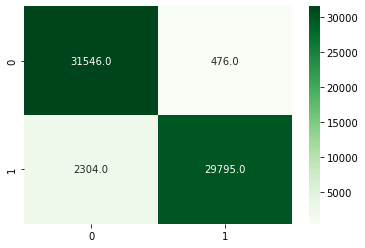

In [188]:
# Train confusion matrix
sns.heatmap(random_s_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [189]:
#Test accuracy
acc_test_smote.append(accuracy_score(y_test_s,y_pred_rfc_s))
accuracy_score(y_test_s,y_pred_rfc_s)

0.9212151456552928

In [190]:
# Test confusion matrix
random_s_test_matrix = confusion_matrix(y_test_s,y_pred_rfc_s)
print(random_s_test_matrix)

[[7774  280]
 [ 983 6994]]


<AxesSubplot:>

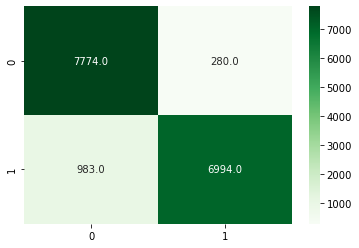

In [191]:
# Test confusion matrix
sns.heatmap(random_s_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [192]:
# Test F1 Score 
f1_test_smote.append(f1_score(y_test_s,y_pred_rfc_s,average='binary'))
f1_score(y_test_s,y_pred_rfc_s,average='binary')

0.9171857583109305

In [193]:
# Test classification report
print(classification_report(y_test_s,y_pred_rfc_s))


              precision    recall  f1-score   support

           0       0.89      0.97      0.92      8054
           1       0.96      0.88      0.92      7977

    accuracy                           0.92     16031
   macro avg       0.92      0.92      0.92     16031
weighted avg       0.92      0.92      0.92     16031



In [194]:
# Test ROC AUC Curve 
roc_test_smote.append(roc_auc_score(y_test_s,y_pred_rfc_s))
roc_auc_score(y_test_s,y_pred_rfc_s)

0.9210026909062089

In [195]:
pre_test_smote.append(precision_score(y_test_s,y_pred_rfc_s))
precision_score(y_test_s,y_pred_rfc_s)



0.9615067363211438

In [196]:
recall_test_smote.append(recall_score(y_test_s,y_pred_rfc_s))
recall_score(y_test_s,y_pred_rfc_s)

0.8767707158079479

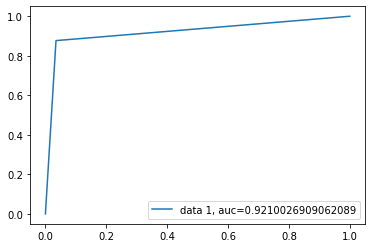

In [197]:
# Test ROC AUC Curve 

fpr, tpr, _ = metrics.roc_curve(y_test_s,  y_pred_rfc_s)
auc = metrics.roc_auc_score(y_test_s, y_pred_rfc_s)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### XGBoost classifier with SMOTE


In [198]:
import xgboost as xgb

xgb_s = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_s.fit(x_train_s,y_train_s)
y_pred_train_xgb_s=xgb_s.predict(x_train_s)
y_pred_xgb_s = xgb_s.predict(x_test_s)

In [199]:
# Train accuracy 
acc_train_smote.append(accuracy_score(y_train_s,y_pred_train_xgb_s))
accuracy_score(y_train_s,y_pred_train_xgb_s)


0.9481137224934109

In [200]:
# Train confusion matrix
xgb_s_train_matrix = confusion_matrix(y_train_s,y_pred_train_xgb_s)
print(xgb_s_train_matrix)

[[31205   817]
 [ 2510 29589]]


<AxesSubplot:>

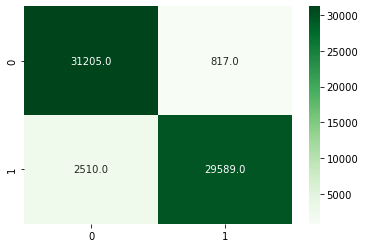

In [201]:
# Train confusion matrix
sns.heatmap(xgb_s_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [202]:
#Test accuracy
acc_test_smote.append(accuracy_score(y_test_s,y_pred_xgb_s))
accuracy_score(y_test_s,y_pred_xgb_s)

0.931320566402595

In [203]:
# Test confusion matrix
xgb_s_test_matrix = confusion_matrix(y_test_s,y_pred_xgb_s)
print(xgb_s_test_matrix)

[[7759  295]
 [ 806 7171]]


<AxesSubplot:>

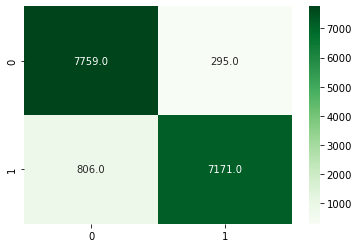

In [204]:
# Test confusion matrix
sns.heatmap(xgb_s_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [205]:
# Test F1 Score 
f1_test_smote.append(f1_score(y_test_s,y_pred_xgb_s,average='binary'))
f1_score(y_test_s,y_pred_xgb_s,average='binary')

0.9287055623907272

In [206]:
# Test classification report
print(classification_report(y_test_s,y_pred_xgb_s))


              precision    recall  f1-score   support

           0       0.91      0.96      0.93      8054
           1       0.96      0.90      0.93      7977

    accuracy                           0.93     16031
   macro avg       0.93      0.93      0.93     16031
weighted avg       0.93      0.93      0.93     16031



In [207]:
# Test ROC AUC Curve 
roc_test_smote.append(roc_auc_score(y_test_s,y_pred_xgb_s))
roc_auc_score(y_test_s,y_pred_xgb_s)

0.9311658729923773

In [208]:
pre_test_smote.append(precision_score(y_test_s,y_pred_xgb_s))
precision_score(y_test_s,y_pred_knn_s)



0.8487620441517258

In [209]:
recall_test_smote.append(recall_score(y_test_s,y_pred_xgb_s))
recall_score(y_test_s,y_pred_knn_s)

0.8723831014165726

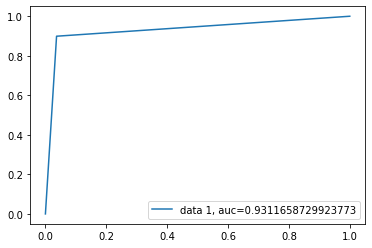

In [210]:
# Test ROC AUC Curve 

fpr, tpr, _ = metrics.roc_curve(y_test_s,  y_pred_xgb_s)
auc = metrics.roc_auc_score(y_test_s, y_pred_xgb_s)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [211]:
result['acc_train_smote'] = acc_train_smote
result['acc_test_smote'] = acc_test_smote
result['f1_test_smote'] = f1_test_smote
result['roc_test_smote'] = roc_test_smote

In [212]:
result['pre_test_smote'] = pre_test_smote
result['recall_test_smote'] = recall_test_smote

In [213]:
result

Model_name  acc_train  acc_test   f1_test  roc_test  \
0  K-Nearest Neighbors (KNN)  0.939982   0.929529  0.719254  0.795208   
1  Decision tree              1.000000   0.884075  0.624094  0.784908   
2  Random forest              0.942111   0.942111  0.751077  0.807504   
3  XGBoost                    0.946849   0.936875  0.747767  0.808618   

   pre_test  recall_test  acc_train_smote  acc_test_smote  f1_test_smote  \
0  0.889822  0.603559     0.908797         0.859148        0.860410        
1  0.605898  0.643416     1.000000         0.866945        0.848261        
2  0.950927  0.620641     0.956644         0.921215        0.917186        
3  0.929175  0.625623     0.948114         0.931321        0.928706        

   roc_test_smote  pre_test_smote  recall_test_smote  
0  0.859211        0.848762        0.872383           
1  0.866374        0.980592        0.747399           
2  0.921003        0.961507        0.876771           
3  0.931166        0.960488        0.898960

### Predication using SMOTETomek to handle data imbalance 

In [214]:
y.value_counts()

0    40076
1    6890 
Name: success, dtype: int64

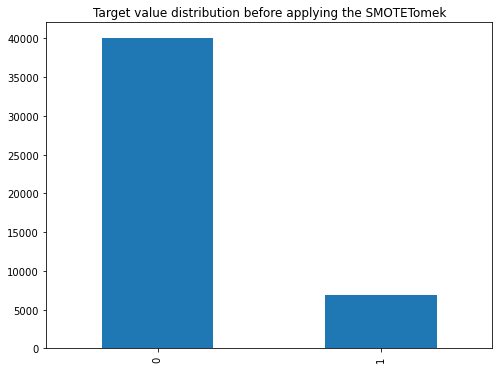

In [215]:
# Target value distribution before applying the SMOTETomek
plt.figure(figsize=(8,6))
y.value_counts().plot(kind="bar")
plt.title("Target value distribution before applying the SMOTETomek")
plt.show()

In [216]:

smt_t = SMOTETomek(random_state=100)
X_st, y_st = smt_t.fit_sample(X, y)

In [217]:
y_st.value_counts()

1    38062
0    38062
Name: success, dtype: int64

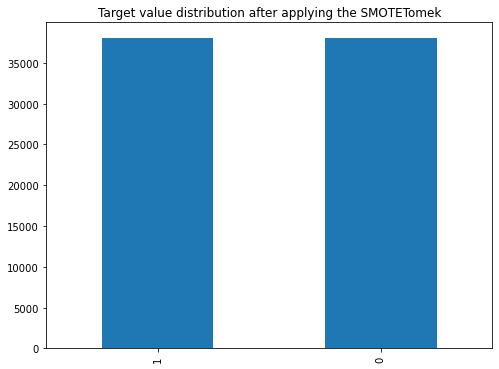

In [218]:
# Target value distribution after applying the SMOTETomek
plt.figure(figsize=(8,6))
y_st.value_counts().plot(kind="bar")
plt.title("Target value distribution after applying the SMOTETomek")
plt.show()

In [219]:
x_train_st,x_test_st,y_train_st,y_test_st=train_test_split(X_st,y_st,test_size=0.2)

### K-Nearest Neighbors Algorithm (KNN) with SMOTETomek


In [220]:
knn_st=KNeighborsClassifier(n_neighbors=5)
knn_st.fit(x_train_st,y_train_st)
y_pred_train_knn_st=knn_st.predict(x_train_st)
y_pred_knn_st=knn_st.predict(x_test_st)

In [221]:
acc_train_smote_tomek = []
acc_test_smote_tomek = []
f1_test_smote_tomek = []
roc_test_smote_tomek = []
pre_test_smote_tomek = []
recall_test_smote_tomek = []

In [222]:
# Train accuracy 
acc_train_smote_tomek.append(accuracy_score(y_train_st,y_pred_train_knn_st))
accuracy_score(y_train_st,y_pred_train_knn_st)


0.9246621455196309

In [223]:
# Train confusion matrix
knn_st_train_matrix = confusion_matrix(y_train_st,y_pred_train_knn_st)
print(knn_st_train_matrix)

[[27773  2658]
 [ 1930 28538]]


<AxesSubplot:>

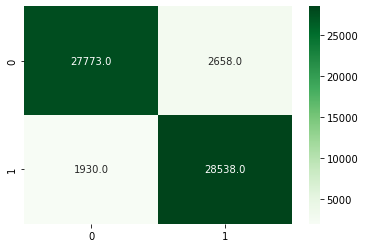

In [224]:
# Train confusion matrix
sns.heatmap(knn_st_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [225]:
#Test accuracy
acc_test_smote_tomek.append(accuracy_score(y_test_st,y_pred_knn_st))
accuracy_score(y_test_st,y_pred_knn_st)


0.8837438423645321

In [226]:
# Test confusion matrix
knn_st_test_matrix = confusion_matrix(y_test_st,y_pred_knn_st)
print(knn_st_test_matrix)

[[6626 1005]
 [ 765 6829]]


<AxesSubplot:>

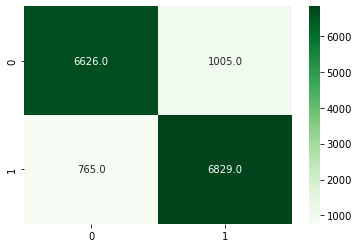

In [227]:
# Test confusion matrix
sns.heatmap(knn_st_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [228]:
# Test F1 Score 
f1_test_smote_tomek.append(f1_score(y_test_st,y_pred_knn_st,average='binary'))
f1_score(y_test_st,y_pred_knn_st,average='binary')

0.8852735286492094

In [229]:
# Test classification report
print(classification_report(y_test_st,y_pred_knn_st))


              precision    recall  f1-score   support

           0       0.90      0.87      0.88      7631
           1       0.87      0.90      0.89      7594

    accuracy                           0.88     15225
   macro avg       0.88      0.88      0.88     15225
weighted avg       0.88      0.88      0.88     15225



In [230]:
# Test ROC AUC Curve 
roc_test_smote_tomek.append(roc_auc_score(y_test_st,y_pred_knn_st))
roc_auc_score(y_test_st,y_pred_knn_st)

0.8837814647688085

In [231]:

pre_test_smote_tomek.append(precision_score(y_test_st,y_pred_knn_st))
precision_score(y_test_st,y_pred_knn_st)


0.8717130456982385

In [232]:

recall_test_smote_tomek.append(recall_score(y_test_st,y_pred_knn_st))
recall_score(y_test_st,y_pred_knn_st)

0.8992625757176719

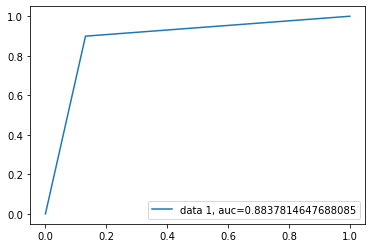

In [233]:
# Test ROC AUC Curve 

fpr, tpr, _ = metrics.roc_curve(y_test_st,  y_pred_knn_st)
auc = metrics.roc_auc_score(y_test_st, y_pred_knn_st)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Decision tree classifier with SMOTETomek


In [234]:
dtc_st=DecisionTreeClassifier()
dtc_st.fit(x_train_st,y_train_st)
y_pred_train_dtc_st=dtc_st.predict(x_train_st)
y_pred_dtc_st=dtc_st.predict(x_test_st)

In [235]:
# Train accuracy 
acc_train_smote_tomek.append(accuracy_score(y_train_st,y_pred_train_dtc_st))
accuracy_score(y_train_st,y_pred_train_dtc_st)


1.0

In [236]:
# Train confusion matrix
dtc_st_train_matrix = confusion_matrix(y_train_st,y_pred_train_dtc_st)
print(dtc_st_train_matrix)

[[30431     0]
 [    0 30468]]


<AxesSubplot:>

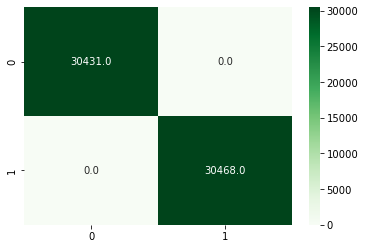

In [237]:
# Train confusion matrix
sns.heatmap(dtc_st_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [238]:
#Test accuracy
acc_test_smote_tomek.append(accuracy_score(y_test_st,y_pred_dtc_st))
accuracy_score(y_test_st,y_pred_dtc_st)

0.9014121510673235

In [239]:
# Test confusion matrix
dtc_st_test_matrix = confusion_matrix(y_test_st,y_pred_dtc_st)
print(dtc_st_test_matrix)

[[6823  808]
 [ 693 6901]]


<AxesSubplot:>

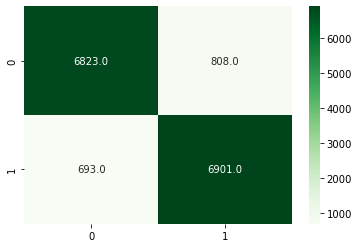

In [240]:
# Test confusion matrix
sns.heatmap(dtc_st_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [241]:
# Test F1 Score 
f1_test_smote_tomek.append(f1_score(y_test_st,y_pred_dtc_st,average='binary'))
f1_score(y_test_st,y_pred_dtc_st,average='binary')

0.901914657256747

In [242]:
# Test classification report
print(classification_report(y_test_st,y_pred_dtc_st))


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7631
           1       0.90      0.91      0.90      7594

    accuracy                           0.90     15225
   macro avg       0.90      0.90      0.90     15225
weighted avg       0.90      0.90      0.90     15225



In [243]:
# Test ROC AUC Curve 
roc_test_smote_tomek.append(roc_auc_score(y_test_st,y_pred_dtc_st))
roc_auc_score(y_test_st,y_pred_dtc_st)

0.9014299252108039

In [244]:
pre_test_smote_tomek.append(precision_score(y_test_st,y_pred_dtc_st))
precision_score(y_test_st,y_pred_dtc_st)


0.8951874432481515

In [245]:

recall_test_smote_tomek.append(recall_score(y_test_st,y_pred_dtc_st))
recall_score(y_test_st,y_pred_dtc_st)

0.9087437450618909

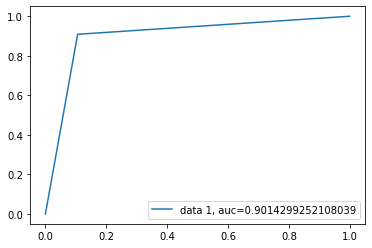

In [246]:
# Test ROC AUC Curve 

fpr, tpr, _ = metrics.roc_curve(y_test_st,  y_pred_dtc_st)
auc = metrics.roc_auc_score(y_test_st, y_pred_dtc_st)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Random forest classifier with SMOTETomek


In [247]:
random_st=RandomForestClassifier(max_depth=25, min_samples_leaf=5, n_estimators=25,
                       random_state=100)
random_st.fit(x_train_st,y_train_st)
y_pred_train_random_st=random_st.predict(x_train_st)
y_pred_rfc_st=random_st.predict(x_test_st)

In [248]:
# Train accuracy 
acc_train_smote_tomek.append(accuracy_score(y_train_st,y_pred_train_random_st))
accuracy_score(y_train_st,y_pred_train_random_st)


0.9591454703689716

In [249]:
# Train confusion matrix
random_st_train_matrix = confusion_matrix(y_train_st,y_pred_train_random_st)
print(random_st_train_matrix)

[[30026   405]
 [ 2083 28385]]


<AxesSubplot:>

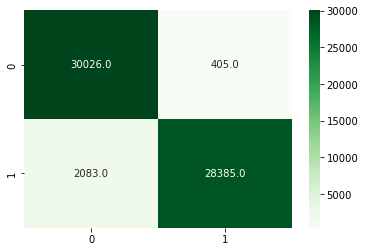

In [250]:
# Train confusion matrix
sns.heatmap(random_st_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [251]:
#Test accuracy
acc_test_smote_tomek.append(accuracy_score(y_test_st,y_pred_rfc_st))
accuracy_score(y_test_st,y_pred_rfc_st)

0.9294581280788178

In [252]:
# Test confusion matrix
random_st_test_matrix = confusion_matrix(y_test_st,y_pred_rfc_st)
print(random_st_test_matrix)

[[7396  235]
 [ 839 6755]]


<AxesSubplot:>

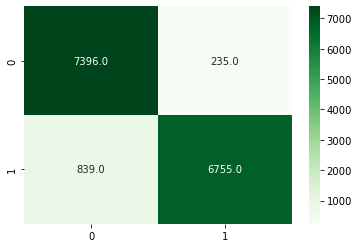

In [253]:
# Test confusion matrix
sns.heatmap(random_st_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [254]:
# Test F1 Score 
f1_test_smote_tomek.append(f1_score(y_test_st,y_pred_rfc_st,average='binary'))
f1_score(y_test_st,y_pred_rfc_st,average='binary')

0.9263576522216126

In [255]:
# Test classification report
print(classification_report(y_test_st,y_pred_rfc_st))


              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7631
           1       0.97      0.89      0.93      7594

    accuracy                           0.93     15225
   macro avg       0.93      0.93      0.93     15225
weighted avg       0.93      0.93      0.93     15225



In [256]:
# Test ROC AUC Curve 
roc_test_smote_tomek.append(roc_auc_score(y_test_st,y_pred_rfc_st))
roc_auc_score(y_test_st,y_pred_rfc_st)

0.9293613004521465

In [257]:
pre_test_smote_tomek.append(precision_score(y_test_st,y_pred_rfc_st))
precision_score(y_test_st,y_pred_rfc_st)



0.9663805436337625

In [258]:
recall_test_smote_tomek.append(recall_score(y_test_st,y_pred_rfc_st))
recall_score(y_test_st,y_pred_rfc_st)

0.8895180405583355

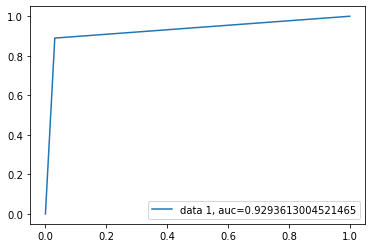

In [259]:
# Test ROC AUC Curve 

fpr, tpr, _ = metrics.roc_curve(y_test_st,  y_pred_rfc_st)
auc = metrics.roc_auc_score(y_test_st, y_pred_rfc_st)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### XGBoost classifier with SMOTETomek


In [260]:
import xgboost as xgb

xgb_st = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_st.fit(x_train_st,y_train_st)
y_pred_train_xgb_st=xgb_st.predict(x_train_st)

y_pred_xgb_st = xgb_st.predict(x_test_st)

In [261]:
# Train accuracy 
acc_train_smote_tomek.append(accuracy_score(y_train_st,y_pred_train_xgb_st))
accuracy_score(y_train_st,y_pred_train_xgb_st)


0.9551388364340958

In [262]:
# Train confusion matrix
xgb_st_train_matrix = confusion_matrix(y_train_st,y_pred_train_xgb_st)
print(xgb_st_train_matrix)

[[29823   608]
 [ 2124 28344]]


<AxesSubplot:>

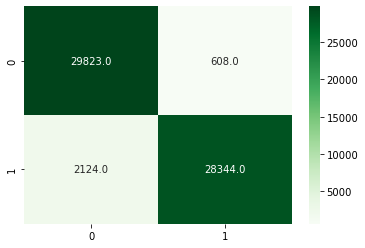

In [263]:
# Train confusion matrix
sns.heatmap(xgb_st_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [264]:
#Test accuracy
acc_test_smote_tomek.append(accuracy_score(y_test_st,y_pred_xgb_st))
accuracy_score(y_test_st,y_pred_xgb_st)

0.9412151067323481

In [265]:
# Test confusion matrix
xgb_st_test_matrix = confusion_matrix(y_test_st,y_pred_xgb_st)
print(xgb_st_test_matrix)

[[7390  241]
 [ 654 6940]]


<AxesSubplot:>

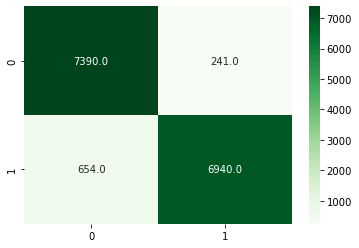

In [266]:
# Test confusion matrix
sns.heatmap(xgb_st_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [267]:
# Test F1 Score 
f1_test_smote_tomek.append(f1_score(y_test_st,y_pred_xgb_st,average='binary'))
f1_score(y_test_st,y_pred_xgb_st,average='binary')

0.939424703891709

In [268]:
# Test classification report
print(classification_report(y_test_st,y_pred_xgb_st))


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7631
           1       0.97      0.91      0.94      7594

    accuracy                           0.94     15225
   macro avg       0.94      0.94      0.94     15225
weighted avg       0.94      0.94      0.94     15225



In [269]:
# Test ROC AUC Curve 
roc_test_smote_tomek.append(roc_auc_score(y_test_st,y_pred_xgb_st))
roc_auc_score(y_test_st,y_pred_xgb_st)

0.9411488361291375

In [270]:
pre_test_smote_tomek.append(precision_score(y_test_st,y_pred_xgb_st))
precision_score(y_test_st,y_pred_xgb_st)



0.9664392145940677

In [271]:
recall_test_smote_tomek.append(recall_score(y_test_st,y_pred_xgb_st))
recall_score(y_test_st,y_pred_xgb_st)

0.9138793784566763

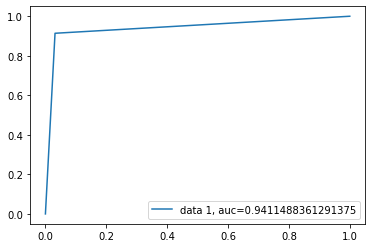

In [272]:
# Test ROC AUC Curve 

fpr, tpr, _ = metrics.roc_curve(y_test_st,  y_pred_xgb_st)
auc = metrics.roc_auc_score(y_test_st, y_pred_xgb_st)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [273]:
result['acc_train_smote_tomek'] = acc_train_smote_tomek
result['acc_test_smote_tomek'] = acc_test_smote_tomek
result['f1_test_smote_tomek'] = f1_test_smote_tomek
result['roc_test_smote_tomek'] = roc_test_smote_tomek

In [274]:
result['pre_test_smote_tomek'] = pre_test_smote_tomek
result['recall_test_smote_tomek'] = recall_test_smote_tomek

In [275]:
result

Model_name  acc_train  acc_test   f1_test  roc_test  \
0  K-Nearest Neighbors (KNN)  0.939982   0.929529  0.719254  0.795208   
1  Decision tree              1.000000   0.884075  0.624094  0.784908   
2  Random forest              0.942111   0.942111  0.751077  0.807504   
3  XGBoost                    0.946849   0.936875  0.747767  0.808618   

   pre_test  recall_test  acc_train_smote  acc_test_smote  f1_test_smote  \
0  0.889822  0.603559     0.908797         0.859148        0.860410        
1  0.605898  0.643416     1.000000         0.866945        0.848261        
2  0.950927  0.620641     0.956644         0.921215        0.917186        
3  0.929175  0.625623     0.948114         0.931321        0.928706        

   roc_test_smote  pre_test_smote  recall_test_smote  acc_train_smote_tomek  \
0  0.859211        0.848762        0.872383           0.924662                
1  0.866374        0.980592        0.747399           1.000000                
2  0.921003        0.961507        0.876771           0.959145                
3  0.931166        0.960488        0.898960           0.955139                

   acc_test_smote_tomek  f1_test_smote_tomek  roc_test_smote_tomek  \
0  0.883744              0.885274             0.883781               
1  0.901412              0.901915             0.901430               
2  0.929458              0.926358             0.929361               
3  0.941215              0.939425             0.941149               

   pre_test_smote_tomek  recall_test_smote_tomek  
0  0.871713              0.899263                 
1  0.895187              0.908744                 
2  0.966381              0.889518                 
3  0.966439              0.913879

### Predication using SMOTEENN to handle data imbalance 


In [276]:
y.value_counts()

0    40076
1    6890 
Name: success, dtype: int64

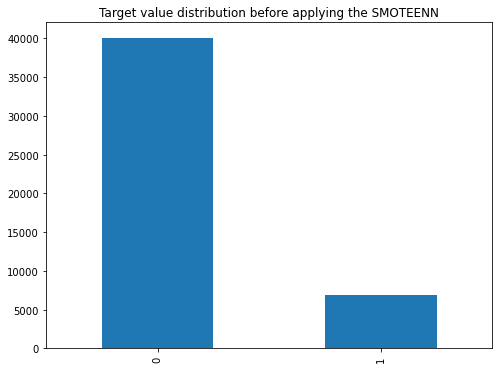

In [277]:
# Target value distribution before applying the SMOTETomek
plt.figure(figsize=(8,6))
y.value_counts().plot(kind="bar")
plt.title("Target value distribution before applying the SMOTEENN")
plt.show()

In [278]:
smt_e = SMOTEENN(random_state=100)
X_se, y_se = smt_e.fit_sample(X, y)

In [279]:
y_se.value_counts()

1    31116
0    28042
Name: success, dtype: int64

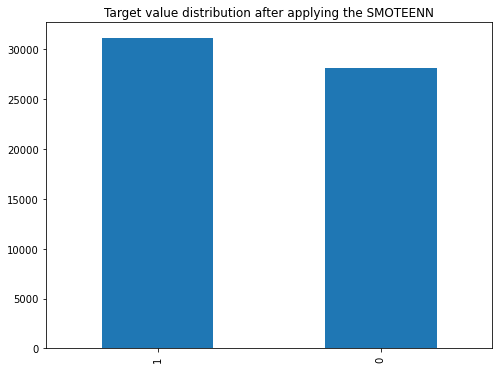

In [280]:
# Target value distribution after applying the SMOTEENN
plt.figure(figsize=(8,6))
y_se.value_counts().plot(kind="bar")
plt.title("Target value distribution after applying the SMOTEENN")
plt.show()

In [281]:
x_train_se,x_test_se,y_train_se,y_test_se=train_test_split(X_se,y_se,test_size=0.2)

### K-Nearest Neighbors Algorithm (KNN) with SMOTEENN


In [282]:
knn_se=KNeighborsClassifier(n_neighbors=5)
knn_se.fit(x_train_se,y_train_se)
y_pred_train_knn_se=knn_se.predict(x_train_se)

y_pred_knn_se=knn_se.predict(x_test_se)

In [283]:
acc_train_smote_enn = []
acc_test_smote_enn = []
f1_test_smote_enn = []
roc_test_smote_enn = []
pre_test_smote_enn = []
recall_test_smote_enn=[]

In [284]:
# Train accuracy 
acc_train_smote_enn.append(accuracy_score(y_train_se,y_pred_train_knn_se))
accuracy_score(y_train_se,y_pred_train_knn_se)


0.9865190381608419

In [285]:
# Train confusion matrix
knn_se_train_matrix = confusion_matrix(y_train_se,y_pred_train_knn_se)
print(knn_se_train_matrix)

[[21984   345]
 [  293 24704]]


<AxesSubplot:>

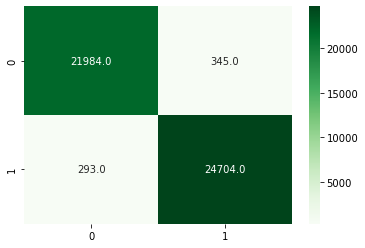

In [286]:
# Train confusion matrix
sns.heatmap(knn_se_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [287]:
#Test accuracy
acc_test_smote_enn.append(accuracy_score(y_test_se,y_pred_knn_se))
accuracy_score(y_test_se,y_pred_knn_se)


0.9731237322515213

In [288]:
# Test confusion matrix
knn_se_test_matrix = confusion_matrix(y_test_se,y_pred_knn_se)
print(knn_se_test_matrix)

[[5543  170]
 [ 148 5971]]


<AxesSubplot:>

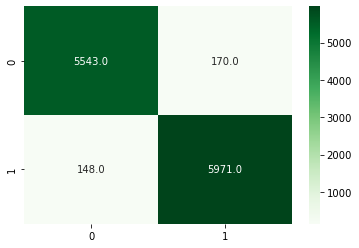

In [289]:
# Test confusion matrix
sns.heatmap(knn_se_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [290]:
# Test F1 Score 
f1_test_smote_enn.append(f1_score(y_test_se,y_pred_knn_se,average='binary'))
f1_score(y_test_se,y_pred_knn_se,average='binary')

0.9740619902120718

In [291]:
# Test classification report
print(classification_report(y_test_se,y_pred_knn_se))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5713
           1       0.97      0.98      0.97      6119

    accuracy                           0.97     11832
   macro avg       0.97      0.97      0.97     11832
weighted avg       0.97      0.97      0.97     11832



In [292]:
# Test ROC AUC Curve 
roc_test_smote_enn.append(roc_auc_score(y_test_se,y_pred_knn_se))
roc_auc_score(y_test_se,y_pred_knn_se)

0.9730281730450964

In [293]:
pre_test_smote_enn.append(precision_score(y_test_se,y_pred_knn_se))
precision_score(y_test_se,y_pred_knn_se)



0.9723172121804267

In [294]:
recall_test_smote_enn.append(recall_score(y_test_se,y_pred_knn_se))
recall_score(y_test_se,y_pred_knn_se)

0.9758130413466253

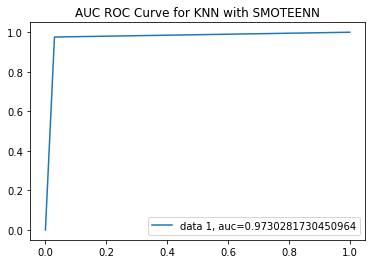

In [295]:
# Test ROC AUC Curve 

fpr, tpr, _ = metrics.roc_curve(y_test_se,  y_pred_knn_se)
auc = metrics.roc_auc_score(y_test_se, y_pred_knn_se)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("AUC ROC Curve for KNN with SMOTEENN")
plt.show()

### Decision tree classifier with SMOTEENN

In [296]:
dtc_se=DecisionTreeClassifier()
dtc_se.fit(x_train_se,y_train_se)
y_pred_train_dtc_se=dtc_se.predict(x_train_se)

y_pred_dtc_se=dtc_se.predict(x_test_se)

In [297]:
# Train accuracy 
acc_train_smote_enn.append(accuracy_score(y_train_se,y_pred_train_dtc_se))
accuracy_score(y_train_se,y_pred_train_dtc_se)


1.0

In [298]:
# Train confusion matrix
dtc_se_train_matrix = confusion_matrix(y_train_se,y_pred_train_dtc_se)
print(dtc_se_train_matrix)

[[22329     0]
 [    0 24997]]


<AxesSubplot:>

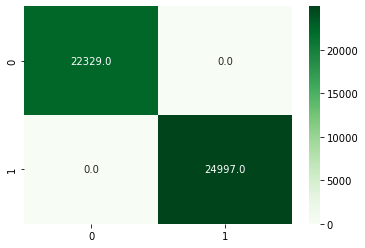

In [299]:
# Train confusion matrix
sns.heatmap(dtc_se_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [300]:
#Test accuracy
acc_test_smote_enn.append(accuracy_score(y_test_se,y_pred_dtc_se))
accuracy_score(y_test_se,y_pred_dtc_se)

0.9470926301555105

In [301]:
# Test confusion matrix
dtc_se_test_matrix = confusion_matrix(y_test_se,y_pred_dtc_se)
print(dtc_se_test_matrix)

[[5362  351]
 [ 275 5844]]


<AxesSubplot:>

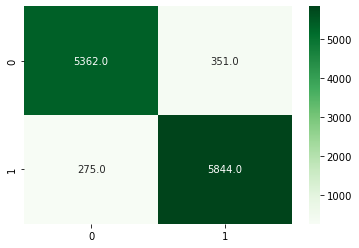

In [302]:
# Test confusion matrix
sns.heatmap(dtc_se_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [303]:
# Test F1 Score 
f1_test_smote_enn.append(f1_score(y_test_se,y_pred_dtc_se,average='binary'))
f1_score(y_test_se,y_pred_dtc_se,average='binary')

0.9491635536787397

In [304]:
# Test classification report
print(classification_report(y_test_se,y_pred_dtc_se))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5713
           1       0.94      0.96      0.95      6119

    accuracy                           0.95     11832
   macro avg       0.95      0.95      0.95     11832
weighted avg       0.95      0.95      0.95     11832



In [305]:
# Test ROC AUC Curve 
roc_test_smote_enn.append(roc_auc_score(y_test_se,y_pred_dtc_se))
roc_auc_score(y_test_se,y_pred_dtc_se)

0.9468095961401742

In [306]:
pre_test_smote_enn.append(precision_score(y_test_se,y_pred_dtc_se))
precision_score(y_test_se,y_pred_dtc_se)




0.9433414043583536

In [307]:
recall_test_smote_enn.append(recall_score(y_test_se,y_pred_dtc_se))
recall_score(y_test_se,y_pred_dtc_se)

0.9550580160156888

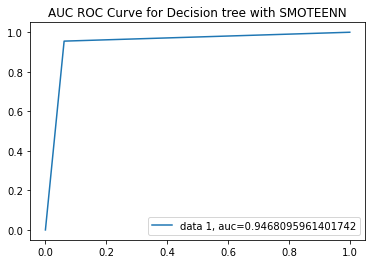

In [308]:
# Test ROC AUC Curve 

fpr, tpr, _ = metrics.roc_curve(y_test_se,  y_pred_dtc_se)
auc = metrics.roc_auc_score(y_test_se, y_pred_dtc_se)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("AUC ROC Curve for Decision tree with SMOTEENN")
plt.show()

### Random forest classifier with SMOTEENN


In [309]:
random_se=RandomForestClassifier(max_depth=25, min_samples_leaf=5, n_estimators=25,
                       random_state=100)
random_se.fit(x_train_se,y_train_se)
y_pred_train_random_se=random_se.predict(x_train_se)

y_pred_rfc_se=random_se.predict(x_test_se)

In [310]:
# Train accuracy 
acc_train_smote_enn.append(accuracy_score(y_train_se,y_pred_train_random_se))
accuracy_score(y_train_se,y_pred_train_random_se)


0.9762498415247433

In [311]:
# Train confusion matrix
random_se_train_matrix = confusion_matrix(y_train_se,y_pred_train_random_se)
print(random_se_train_matrix)

[[22218   111]
 [ 1013 23984]]


<AxesSubplot:>

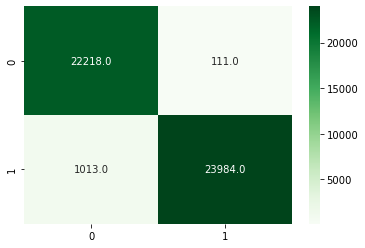

In [312]:
# Train confusion matrix
sns.heatmap(random_se_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [313]:
#Test accuracy
acc_test_smote_enn.append(accuracy_score(y_test_se,y_pred_rfc_se))
accuracy_score(y_test_se,y_pred_rfc_se)

0.9576572008113591

In [314]:
# Test confusion matrix
random_se_test_matrix = confusion_matrix(y_test_se,y_pred_rfc_se)
print(random_se_test_matrix)

[[5632   81]
 [ 420 5699]]


<AxesSubplot:>

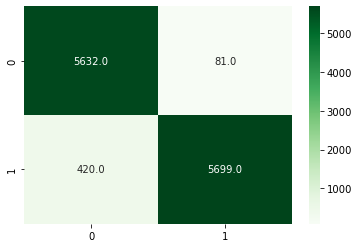

In [315]:
# Test confusion matrix
sns.heatmap(random_se_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [316]:
# Test F1 Score 
f1_test_smote_enn.append(f1_score(y_test_se,y_pred_rfc_se,average='binary'))
f1_score(y_test_se,y_pred_rfc_se,average='binary')

0.9578956214807965

In [317]:
# Test classification report
print(classification_report(y_test_se,y_pred_rfc_se))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5713
           1       0.99      0.93      0.96      6119

    accuracy                           0.96     11832
   macro avg       0.96      0.96      0.96     11832
weighted avg       0.96      0.96      0.96     11832



In [318]:
# Test ROC AUC Curve
roc_test_smote_enn.append(roc_auc_score(y_test_se,y_pred_rfc_se))
roc_auc_score(y_test_se,y_pred_rfc_se)

0.9585915717292315

In [319]:
pre_test_smote_enn.append(precision_score(y_test_se,y_pred_rfc_se))
precision_score(y_test_se,y_pred_rfc_se)



0.9859861591695501

In [320]:

recall_test_smote_enn.append(recall_score(y_test_se,y_pred_rfc_se))
recall_score(y_test_se,y_pred_rfc_se)

0.9313613335512338

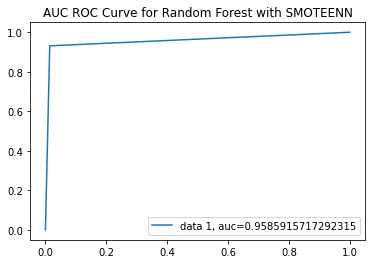

In [321]:
# Test ROC AUC Curve 

fpr, tpr, _ = metrics.roc_curve(y_test_se,  y_pred_rfc_se)
auc = metrics.roc_auc_score(y_test_se, y_pred_rfc_se)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("AUC ROC Curve for Random Forest with SMOTEENN")
plt.show()

### XGBoost classifier with SMOTEENN

In [322]:
import xgboost as xgb

xgb_se = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_se.fit(x_train_se,y_train_se)
y_pred_train_xgb_se=xgb_se.predict(x_train_se)

y_pred_xgb_se = xgb_se.predict(x_test_se)


In [323]:
# Train accuracy 
acc_train_smote_enn.append(accuracy_score(y_train_se,y_pred_train_xgb_se))
accuracy_score(y_train_se,y_pred_train_xgb_se)


0.9798630773781853

In [324]:
# Train confusion matrix
xgb_se_train_matrix = confusion_matrix(y_train_se,y_pred_train_xgb_se)
print(xgb_se_train_matrix)

[[22166   163]
 [  790 24207]]


<AxesSubplot:>

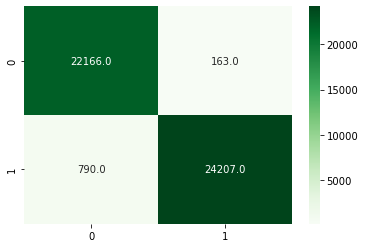

In [325]:
# Train confusion matrix
sns.heatmap(xgb_se_train_matrix, annot=True, cmap="Greens", fmt=".1f")

In [326]:
#Test accuracy
acc_test_smote_enn.append(accuracy_score(y_test_se,y_pred_xgb_se))
accuracy_score(y_test_se,y_pred_xgb_se)

0.968052738336714

In [327]:
# Test confusion matrix
xgb_se_test_matrix = confusion_matrix(y_test_se,y_pred_xgb_se)
print(xgb_se_test_matrix)

[[5635   78]
 [ 300 5819]]


<AxesSubplot:>

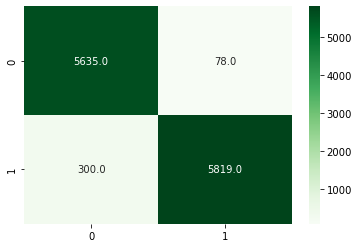

In [328]:
# Test confusion matrix
sns.heatmap(xgb_se_test_matrix, annot=True, cmap="Greens", fmt=".1f")

In [329]:
# Test F1 Score 
f1_test_smote_enn.append(f1_score(y_test_se,y_pred_xgb_se,average='binary'))
f1_score(y_test_se,y_pred_xgb_se,average='binary')

0.9685419440745673

In [330]:
# Test classification report
print(classification_report(y_test_se,y_pred_xgb_se))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5713
           1       0.99      0.95      0.97      6119

    accuracy                           0.97     11832
   macro avg       0.97      0.97      0.97     11832
weighted avg       0.97      0.97      0.97     11832



In [331]:
# Test ROC AUC Curve 
roc_test_smote_enn.append(roc_auc_score(y_test_se,y_pred_xgb_se))
roc_auc_score(y_test_se,y_pred_xgb_se)

0.9686596545834186

In [332]:
pre_test_smote_enn.append(precision_score(y_test_se,y_pred_xgb_se))
precision_score(y_test_se,y_pred_xgb_se)




0.9867729353908767

In [333]:
recall_test_smote_enn.append(recall_score(y_test_se,y_pred_xgb_se))
recall_score(y_test_se,y_pred_xgb_se)

0.9509723811080242

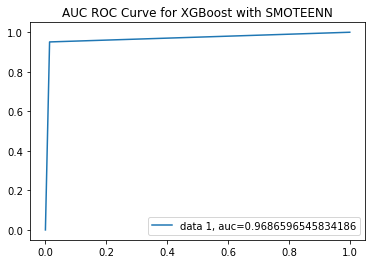

In [334]:
# Test ROC AUC Curve 

fpr, tpr, _ = metrics.roc_curve(y_test_se,  y_pred_xgb_se)
auc = metrics.roc_auc_score(y_test_se, y_pred_xgb_se)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("AUC ROC Curve for XGBoost with SMOTEENN")
plt.show()

In [335]:
result['acc_train_smote_enn'] = acc_train_smote_enn
result['acc_test_smote_enn'] = acc_test_smote_enn
result['f1_test_smote_enn'] = f1_test_smote_enn
result['roc_test_smote_enn'] = roc_test_smote_enn

In [336]:
result['pre_test_smote_enn'] = pre_test_smote_enn
result['recall_test_smote_enn'] = recall_test_smote_enn

In [337]:
result

Model_name  acc_train  acc_test   f1_test  roc_test  \
0  K-Nearest Neighbors (KNN)  0.939982   0.929529  0.719254  0.795208   
1  Decision tree              1.000000   0.884075  0.624094  0.784908   
2  Random forest              0.942111   0.942111  0.751077  0.807504   
3  XGBoost                    0.946849   0.936875  0.747767  0.808618   

   pre_test  recall_test  acc_train_smote  acc_test_smote  f1_test_smote  \
0  0.889822  0.603559     0.908797         0.859148        0.860410        
1  0.605898  0.643416     1.000000         0.866945        0.848261        
2  0.950927  0.620641     0.956644         0.921215        0.917186        
3  0.929175  0.625623     0.948114         0.931321        0.928706        

   roc_test_smote  pre_test_smote  recall_test_smote  acc_train_smote_tomek  \
0  0.859211        0.848762        0.872383           0.924662                
1  0.866374        0.980592        0.747399           1.000000                
2  0.921003        0.961507        0.876771           0.959145                
3  0.931166        0.960488        0.898960           0.955139                

   acc_test_smote_tomek  f1_test_smote_tomek  roc_test_smote_tomek  \
0  0.883744              0.885274             0.883781               
1  0.901412              0.901915             0.901430               
2  0.929458              0.926358             0.929361               
3  0.941215              0.939425             0.941149               

   pre_test_smote_tomek  recall_test_smote_tomek  acc_train_smote_enn  \
0  0.871713              0.899263                 0.986519              
1  0.895187              0.908744                 1.000000              
2  0.966381              0.889518                 0.976250              
3  0.966439              0.913879                 0.979863              

   acc_test_smote_enn  f1_test_smote_enn  roc_test_smote_enn  \
0  0.973124            0.974062           0.973028             
1  0.947093            0.949164           0.946810             
2  0.957657            0.957896           0.958592             
3  0.968053            0.968542           0.968660             

   pre_test_smote_enn  recall_test_smote_enn  
0  0.972317            0.975813               
1  0.943341            0.955058               
2  0.985986            0.931361               
3  0.986773            0.950972

## Results

In [338]:
result[['Model_name','acc_test','acc_test_smote','acc_test_smote_tomek','acc_test_smote_enn']]

Model_name  acc_test  acc_test_smote  acc_test_smote_tomek  \
0  K-Nearest Neighbors (KNN)  0.929529  0.859148        0.883744               
1  Decision tree              0.884075  0.866945        0.901412               
2  Random forest              0.942111  0.921215        0.929458               
3  XGBoost                    0.936875  0.931321        0.941215               

   acc_test_smote_enn  
0  0.973124            
1  0.947093            
2  0.957657            
3  0.968053

In [339]:
result[['Model_name','acc_train','acc_train_smote','acc_train_smote_tomek','acc_train_smote_enn']]

Model_name  acc_train  acc_train_smote  \
0  K-Nearest Neighbors (KNN)  0.939982   0.908797          
1  Decision tree              1.000000   1.000000          
2  Random forest              0.942111   0.956644          
3  XGBoost                    0.946849   0.948114          

   acc_train_smote_tomek  acc_train_smote_enn  
0  0.924662               0.986519             
1  1.000000               1.000000             
2  0.959145               0.976250             
3  0.955139               0.979863

In [340]:
result[['Model_name','pre_test','pre_test_smote','pre_test_smote_tomek','pre_test_smote_enn']]

Model_name  pre_test  pre_test_smote  pre_test_smote_tomek  \
0  K-Nearest Neighbors (KNN)  0.889822  0.848762        0.871713               
1  Decision tree              0.605898  0.980592        0.895187               
2  Random forest              0.950927  0.961507        0.966381               
3  XGBoost                    0.929175  0.960488        0.966439               

   pre_test_smote_enn  
0  0.972317            
1  0.943341            
2  0.985986            
3  0.986773

In [341]:
result[['Model_name','recall_test','recall_test_smote','recall_test_smote_tomek','recall_test_smote_enn']]

Model_name  recall_test  recall_test_smote  \
0  K-Nearest Neighbors (KNN)  0.603559     0.872383            
1  Decision tree              0.643416     0.747399            
2  Random forest              0.620641     0.876771            
3  XGBoost                    0.625623     0.898960            

   recall_test_smote_tomek  recall_test_smote_enn  
0  0.899263                 0.975813               
1  0.908744                 0.955058               
2  0.889518                 0.931361               
3  0.913879                 0.950972

In [342]:
result[['Model_name','roc_test','roc_test_smote','roc_test_smote_tomek','roc_test_smote_enn']]

Model_name  roc_test  roc_test_smote  roc_test_smote_tomek  \
0  K-Nearest Neighbors (KNN)  0.795208  0.859211        0.883781               
1  Decision tree              0.784908  0.866374        0.901430               
2  Random forest              0.807504  0.921003        0.929361               
3  XGBoost                    0.808618  0.931166        0.941149               

   roc_test_smote_enn  
0  0.973028            
1  0.946810            
2  0.958592            
3  0.968660

In [343]:
result[['Model_name','f1_test','f1_test_smote','f1_test_smote_tomek','f1_test_smote_enn']]

Model_name   f1_test  f1_test_smote  f1_test_smote_tomek  \
0  K-Nearest Neighbors (KNN)  0.719254  0.860410       0.885274              
1  Decision tree              0.624094  0.848261       0.901915              
2  Random forest              0.751077  0.917186       0.926358              
3  XGBoost                    0.747767  0.928706       0.939425              

   f1_test_smote_enn  
0  0.974062           
1  0.949164           
2  0.957896           
3  0.968542

In [344]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['acc_train'],
    name='Train Accuracy',
    
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['acc_train_smote'],
    name='Train Accuracy SMOTE',
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['acc_train_smote_tomek'],
    name='Train Accuracy SMOTETomek',
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['acc_train_smote_enn'],
    name='Train Accuracy SMOTEENN',
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title = 'Performance of models on Train Data', barmode='group')
fig.show()

In [345]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['acc_test'],
    name='Test Accuracy',
    
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['acc_test_smote'],
    name='Test Accuracy SMOTE',
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['acc_test_smote_tomek'],
    name='Test Accuracy SMOTETomek',
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['acc_test_smote_enn'],
    name='Test Accuracy SMOTEENN',
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title = 'Performance of models on Test Data', barmode='group')
fig.show()

In [346]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['f1_test'],
    name='F1 Score',
    
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['f1_test_smote'],
    name='F1 Score SMOTE',
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['f1_test_smote_tomek'],
    name='F1 Score SMOTETomek',
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['f1_test_smote_enn'],
    name='F1 Score SMOTEENN',
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title = 'F1 Score of models on Test Data', barmode='group')
fig.show()

In [347]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['roc_test'],
    name='AUC ROC Score',
    
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['roc_test_smote'],
    name='AUC ROC Score SMOTE',
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['roc_test_smote_tomek'],
    name='AUC ROC Score SMOTETomek',
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['roc_test_smote_enn'],
    name='AUC ROC Score SMOTEENN',
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title = 'AUC ROC Score of models on Test Data', barmode='group')
fig.show()

In [348]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['pre_test'],
    name='Precision',
    
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['pre_test_smote'],
    name='Precision SMOTE',
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['pre_test_smote_tomek'],
    name='Precision SMOTETomek',
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['pre_test_smote_enn'],
    name='Precision SMOTEENN',
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title = 'Precision of models on Test Data', barmode='group')
fig.show()

In [349]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['recall_test'],
    name='Precision',
    
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['recall_test_smote'],
    name='Precision SMOTE',
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['recall_test_smote_tomek'],
    name='Precision SMOTETomek',
))
fig.add_trace(go.Bar(
    x=result['Model_name'],
    y=result['recall_test_smote_enn'],
    name='Precision SMOTEENN',
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title = 'Recall of models on Test Data', barmode='group')
fig.show()